# Important Libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Important Constants:

In [4]:
_ELECTROMAGNETIC_FINE_STRUCTURE_CONSTANT = (1. / 137.0359998)
_ELECTROMAGNETIC_FINE_STRUCTURE_CONSTANT_INVERSE = 0.0072973525693
_PI_DECIMAL = 3.141592653589793238462643383279502884197
_PI_RADIANS = _PI_DECIMAL / 180.
_MASS_OF_PROTON_IN_GEV = .93827208816
_MASS_OF_PROTON_SQUARED_IN_GEV_SQUARED = _MASS_OF_PROTON_IN_GEV *_MASS_OF_PROTON_IN_GEV
_CONVERT_GEV_TO_NANOBARNS_FACTOR = .389379 * 1000000.
_EXPERIMENTALLY_DETERMINED_CONSTANT_IN_ELECTRIC_FORM_FACTOR = 0.710649
_PROTON_MAGNETIC_MOMENT = 2.79284734463

The entire Bethe-Heitler amplitude squared: $$|\mathcal{M}_{BH}^{2}| = \frac{e^{6}}{x_{B}^{2} y^{2} (1 + \varepsilon^{2})^{2} \Delta^{2} P_{1}(\phi) P_{2}(\phi)} (c_{0}^{BH} + \sum_{n = 1}^{2} c_{n}^{BH} cos(n \phi) + s_{1}^{BH} sin(\phi))$$

## Bilinear CFF Product

In [5]:
def bilinear_cff_product(cff_1_real_part, cff_1_imaginary_part, cff_2_real_part, cff_2_imaginary_part):
    """
    Sadly, half the shit in this formalism is bilinear in the CFFs, which means we
    have to be careful about how to handle the complex variables. Recall:

    z1 * z2 = x1 * x2 - y1 * y2 + i (y1 * x2 - y2 * x1).
    
    So, we just have to code this up.
    """
    real_part = cff_1_real_part*cff_2_real_part - cff_1_imaginary_part*cff_2_imaginary_part
    imaginary_part = cff_1_imaginary_part*cff_2_real_part - cff_2_imaginary_part*cff_1_real_part
    return complex(real_part, imaginary_part)

## Convert to $nb/GeV^{4}$

In [6]:
def convert_to_nb_over_GeV4(number: float) -> float:
    """
    """
    return (.389379 * 1000000) * number

## Convert Degrees to Radians

In [7]:
def convert_degrees_to_radians(degrees: float) -> float:
    """
    """
    return (degrees * np.pi / 180.)

# Derived Kinematics:

## $\varepsilon = \frac{2 x_{B} m_{p}}{Q}$:

In [8]:
def calculate_kinematics_epsilon(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    verbose: bool = True) -> float:
    """
    Description
    --------------
    Calculate epsilon, which is just a ratio of kinematic quantities:
    \epsilon := 2 * m_{p} * x_{B} / Q

    Parameters
    --------------
    squared_Q_momentum_transfer: (float)
        kinematic momentum transfer to the hadron. 

    x_Bjorken: (float)
        kinematic Bjorken X

    verbose: (bool)
        Debugging console output.
    

    Notes
    --------------
    """
            
    try:

        # (1): Calculate Epsilon right away:
        epsilon = (2. * x_Bjorken * _MASS_OF_PROTON_IN_GEV) / np.sqrt(squared_Q_momentum_transfer)

        # (1.1): If verbose, print the result:
        if verbose:
            print(f"> Calculated epsilon to be: {epsilon}")

        # (2): Return Epsilon:
        return epsilon
    
    except Exception as ERROR:
        print(f"> Error in computing kinematic epsilon:\n> {ERROR}")
        return 0.

## $\varepsilon^{2} = \frac{4 x_{B}^{2} m_{p}^{2}}{Q^{2}}$:

In [9]:
def calculate_kinematics_epsilon_squared(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    verbose: bool = True) -> float:
    """
    Description
    --------------
    Calculate epsilon, which is just a ratio of kinematic quantities:
    \epsilon^{2} := 4 * m_{p}^{2} * x_{B}^{2} / Q^{2}

    Parameters
    --------------
    squared_Q_momentum_transfer: (float)
        kinematic momentum transfer to the hadron

    x_Bjorken: (float)
        kinematic Bjorken X

    verbose: (bool)
        Debugging console output.
    

    Notes
    --------------
    """

    try:

        # (1): Calculate it right away:
        epsilon_squared = (4. * _MASS_OF_PROTON_IN_GEV**2 * x_Bjorken**2) / squared_Q_momentum_transfer

        # (1.1): If verbose, print the result:
        if verbose:
            print(f"> Calculated epsilon squared to be: {epsilon_squared}")

        # (2): Return Epsilon:
        return epsilon_squared
    
    except Exception as ERROR:
        print(f"> Error in computing kinematic epsilon squared:\n> {ERROR}")
        return 0.

## y = $\frac{p_{1} \cdot q_{1}}{p_{1} \cdot k} = \frac{Q}{\epsilon k}$

In [10]:
def calculate_kinematics_lepton_energy_fraction_y(
    squared_Q_momentum_transfer: float, 
    lab_kinematics_k: float,
    epsilon: float, 
    verbose: bool = True) -> float:
    """
    Description
    --------------
    Calculate y, which measures the lepton energy fraction.
    y^{2} := \frac{ \sqrt{Q^{2}} }{ \sqrt{\epsilon^{2}} k }

    Parameters
    --------------
    epsilon: (float)
        derived kinematics

    squared_Q_momentum_transfer: (float)
        Q^{2} momentum transfer to the hadron

    lab_kinematics_k: (float)
        lepton momentum loss

    verbose: (bool)
        Debugging console output.

    Notes
    --------------

    """
    try:

        # (1): Calculate the y right away:
        lepton_energy_fraction_y = np.sqrt(squared_Q_momentum_transfer) / (epsilon * lab_kinematics_k)

        # (1.1): If verbose output, then print the result:
        if verbose:
            print(f"> Calculated y to be: {lepton_energy_fraction_y}")


        # (2): Return the calculation:
        return lepton_energy_fraction_y
    
    except Exception as ERROR:
        print(f"> Error in computing lepton_energy_fraction_y:\n> {ERROR}")
        return 0.

## $\xi = x_{B} \left(\frac{1 + \frac{t}{2 Q^{2}}}{2 - x_{B} + \frac{x_{B} t }{Q^{2}}}\right)$

In [11]:
def calculate_kinematics_skewness_parameter(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float, 
    verbose = False) -> float:
    """
    Description
    --------------
    Calculate the Skewness Parameter
    x_{i} = x_{B} * (1 + \frac{ t Q^{2} }{ 2 } ) ... FUCK YOU

    Parameters
    --------------
    squared_Q_momentum_transfer: (float)
        kinematic momentum transfer to the hadron

    x_Bjorken: (float)
        kinematic Bjorken X

    verbose: (bool)
        Debugging console output.
    

    Notes
    --------------
    """
    try:

        # (1): The Numerator:
        numerator = (1. + (squared_hadronic_momentum_transfer_t / (2. * squared_Q_momentum_transfer)))

        # (2): The Denominator:
        denominator = (2. - x_Bjorken + (x_Bjorken * squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer))

        # (3): Calculate the Skewness Parameter:
        skewness_parameter = x_Bjorken * numerator / denominator

        # (3.1): If verbose, print the output:
        if verbose:
            print(f"> Calculated skewness xi to be: {skewness_parameter}")

        # (4): Return Xi:
        return skewness_parameter
    
    except Exception as ERROR:
        print(f"> Error in computing skewness xi:\n> {ERROR}")
        return 0.

## $t_{0} = - \frac{4 \xi^{2} m_{p}^{2}}{1 - \xi^{2}}$

In [12]:
def calculate_kinematics_t_naught(
    skewness_parameter: float, 
    verbose = False) -> float:
    """
    Description
    --------------
    Calculate t_{0}.

    Parameters
    --------------
    skewness_parameter: (float)
        skewness parameter

    Returns
    --------------
    t_naught: (float)
        t_naught

    Notes
    --------------
    """
    try:

        # (1): Calculate the Numerator:
        numerator = 4. * skewness_parameter**2 * _MASS_OF_PROTON_IN_GEV**2

        # (2): Calculate the Denominator:
        denominator = 1. - (skewness_parameter**2)

        # (3): Obtain the t minimum
        t_naught = (-1.) * numerator / denominator

        # (3.1): If verbose, print the result:
        if verbose:
            print(f"> Calculated the t_0 to be: {t_naught}")

        # (4): Print the result:
        return t_naught

    except Exception as ERROR:
        print(f"> Error calculating t_naught: \n> {ERROR}")
        return 0.

## $t_{\text{min}} = - Q^{2} \frac{2 (1 - x_{B}) (1 - \sqrt{1 + \epsilon^{2}}) + \epsilon^{2}}{4 x_{B} (1 - x_{B}) + \epsilon^{2}}$

In [13]:
def calculate_kinematics_t_min(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    epsilon: float, 
    verbose: bool = True) -> float:
    """
    Description
    --------------
    Calculate t_{min}.

    Parameters
    --------------
    epsilon: (float)

    Returns
    --------------
    t_minimum: (float)
        t_minimum

    Notes
    --------------
    """
    try:

        # (1): Calculate 1 - x_{B}:
        one_minus_xb = 1. - x_Bjorken

        # (2): Calculate the numerator:
        numerator = (2. * one_minus_xb * (1. - np.sqrt(1. + epsilon**2))) + epsilon**2

        # (3): Calculate the denominator:
        denominator = (4. * x_Bjorken * one_minus_xb) + epsilon**2

        # (4): Obtain the t minimum
        t_minimum = -1. * squared_Q_momentum_transfer * numerator / denominator

        # (4.1): If verbose, print the result:
        if verbose:
            print(f"> Calculated t_minimum to be: {t_minimum}")

        # (5): Print the result:
        return t_minimum

    except Exception as ERROR:
        print(f"> Error calculating t_minimum: \n> {ERROR}")
        return 0.

## $t' = t - t_{\text{min}}$

In [14]:
def calculate_kinematics_t_prime(
    squared_hadronic_momentum_transfer_t: float,
    squared_hadronic_momentum_transfer_t_minimum: float,
    verbose = False) -> float:
    """
    Description
    --------------
    Calculate t prime.

    Parameters
    --------------
    squared_hadronic_momentum_transfer_t: (float)

    squared_hadronic_momentum_transfer_t_minimum: (float)

    verbose: (float)

    Returns
    --------------
    t_prime: (float)

    Notes
    --------------
    """
    try:

        # (1): Obtain the t_prime immediately
        t_prime = squared_hadronic_momentum_transfer_t - squared_hadronic_momentum_transfer_t_minimum

        # (1.1): If verbose, print the result:
        if verbose:
            print(f"> Calculated t prime to be: {t_prime}")

        # (2): Return t_prime
        return t_prime

    except Exception as ERROR:
        print(f"> Error calculating t_prime:\n> {ERROR}")
        return 0.

## $\tilde{K} = \sqrt{t_{0} - t} \sqrt{(1 - x_{B}) \sqrt{1 + \epsilon^{2}} + \frac{(t_{0} - t)(\epsilon^{2} + 4(1 - x_{B}) x_{B})}{4 Q^{2}}} \frac{\sqrt{1 - y - \frac{y^{2} \epsilon^{2}}{4}}}{\sqrt{1 - y + \frac{y^{2} \epsilon^{2}}{4}}}$

In [15]:
def calculate_kinematics_k_tilde(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    lepton_energy_fraction_y: float,
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float, 
    squared_hadronic_momentum_transfer_t_minimum: float,
    verbose: bool = True) -> float:
    """
    Description
    --------------

    Parameters
    --------------
    epsilon: (float)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    lepton_energy_fraction_y: (float)

    squared_hadronic_momentum_transfer_t: (float)

    squared_hadronic_momentum_transfer_t_minimum: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    k_tilde : (float)
        result of the operation
    
    Notes
    --------------
    """
    
    try:

        # (1): Calculate recurring quantity t_{min} - t
        tmin_minus_t = squared_hadronic_momentum_transfer_t_minimum - squared_hadronic_momentum_transfer_t

        # (2): Calculate the duplicate quantity 1 - x_{B}
        one_minus_xb = 1. - x_Bjorken

        # (3): Calculate the crazy root quantity:
        second_root_quantity = (one_minus_xb * np.sqrt(1. + epsilon**2)) + ((tmin_minus_t * (epsilon**2 + (4. * one_minus_xb * x_Bjorken))) / (4. * squared_Q_momentum_transfer))
    
        # (4): Calculate the first annoying root quantity:
        first_root_quantity = np.sqrt(1. - lepton_energy_fraction_y - lepton_energy_fraction_y**2 * epsilon**2 / 4.)

        # (5): Calculate the second annoying root quantity:
        second_root_quantity = np.sqrt(1. - lepton_energy_fraction_y + lepton_energy_fraction_y**2 * epsilon**2 / 4.)
        
        # (6): Calculate K_tilde
        k_tilde = np.sqrt(tmin_minus_t) * np.sqrt(second_root_quantity) * first_root_quantity / second_root_quantity

        # (6.1): Print the result of the calculation:
        if verbose:
            print(f"> Calculated k_tilde to be: {k_tilde}")

        # (7) Return:
        return k_tilde

    except Exception as ERROR:
        print(f"> Error in calculating K_tilde:\n> {ERROR}")
        return 0.

## $K = \sqrt{1 - y + \frac{\epsilon^{2} y^{2}}{4}}\frac{\tilde{K}}{Q}$ (BKM10)

In [16]:
def calculate_kinematics_k(
    squared_Q_momentum_transfer: float, 
    lepton_energy_fraction_y: float,
    epsilon: float,
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the amazing prefactor:
        prefactor = np.sqrt((1. - lepton_energy_fraction_y + (epsilon**2 * lepton_energy_fraction_y**2 / 4.)) / squared_Q_momentum_transfer)

        # (2): Calculate the remaining part of the term:
        kinematic_k = prefactor * k_tilde

        # (2.1); If verbose, log the output:
        if verbose:
            print(f"> Calculated kinematic K to be: {kinematic_k}")

        # (3): Return the value:
        return kinematic_k

    except Exception as ERROR:
        print(f"> Error in calculating derived kinematic K:\n> {ERROR}")
        return 0.

## $k \cdot \Delta = - \frac{Q^{2}}{2 y (1 + \epsilon^{2})} (1 + 2 K cos(\phi) - \frac{\Delta^{2}}{Q^{2}}( 1 - x_{B} (2 - y) + \frac{y \epsilon^{2}}{2}) + \frac{y \epsilon^{2}}{2})$

In [17]:
def calculate_k_dot_delta(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    azimuthal_phi: float,
    epsilon: float, 
    lepton_energy_fraction_y: float,
    kinematic_k: float,
    verbose: bool = True):
    """
    Description
    --------------
    Equation (29) in the BKM Formalism, available
    at this link: https://arxiv.org/pdf/hep-ph/0112108.pdf

    Parameters
    --------------
    kinematic_k: (float)
    
    epsilon: (float)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    lepton_energy_fraction_y: (float)

    squared_hadronic_momentum_transfer_t: (float)

    azimuthal_phi: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    k_dot_delta_result : (float)
        result of the operation
    
    Notes
    --------------
    (1): k-dot-delta shows up in computing the lepton
        propagators. It is Eq. (29) in the following
        paper: https://arxiv.org/pdf/hep-ph/0112108.pdf
    """

    try:
    
        # (1): The prefactor: \frac{Q^{2}}{2 y (1 + \varepsilon^{2})}
        prefactor = squared_Q_momentum_transfer / (2. * lepton_energy_fraction_y * (1. + epsilon**2))

        # (2): Second term in parentheses: Phi-Dependent Term: 2 K cos(\phi)
        phi_dependence = 2. * kinematic_k * np.cos(_PI_DECIMAL - convert_degrees_to_radians(azimuthal_phi))

        # (3): Prefactor of third term in parentheses: \frac{t}{Q^{2}}
        ratio_delta_to_q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (4): Second term in the third term's parentheses: x_{B} (2 - y)
        bjorken_scaling = x_Bjorken * (2. - lepton_energy_fraction_y)

        # (5): Third term in the third term's parentheses: \frac{y \varepsilon^{2}}{2}
        ratio_y_epsilon = lepton_energy_fraction_y * epsilon**2 / 2.

        # (6): Adding up all the "correction" pieces to the prefactor, written as (1 + correction)
        correction = phi_dependence - (ratio_delta_to_q_squared * (1. - bjorken_scaling + ratio_y_epsilon)) + (ratio_y_epsilon)

        # (7): Writing it explicitly as "1 + correction"
        in_parentheses = 1. + correction

        # (8): The actual equation:
        k_dot_delta_result = -1. * prefactor * in_parentheses

        # (8.1): If verbose, print the output:
        if verbose:
            print(f"> Calculated k dot delta: {k_dot_delta_result}")

        # (9): Return the number:
        return k_dot_delta_result
    
    except Exception as E:
        print(f"> Error in calculating k.Delta:\n> {E}")
        return 0.

## $P_{1}(\phi) = 1 + 2 \frac{k\cdot \Delta}{Q^{2}}$

In [18]:
def calculate_lepton_propagator_p1(
    squared_Q_momentum_transfer: float, 
    k_dot_delta: float,
    verbose = False
    ):
    """
    Description
    --------------
    Equation (28) [first equation] divided through by
    Q^{2} according to the following paper:
    https://arxiv.org/pdf/hep-ph/0112108.pdf

    Parameters
    --------------
    k_dot_delta: (float)

    squared_Q_momentum_transfer: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    """
    try:
        p1_propagator = 1. + (2. * (k_dot_delta / squared_Q_momentum_transfer))
        
        if verbose:
            print(f"> Computed the P1 propagator to be: {p1_propagator}")

        return p1_propagator
    
    except Exception as E:
        print(f"> Error in computing p1 propagator:\n> {E}")
        return None

## $P_{2}(\phi) = \frac{-2 k \cdot \Delta}{Q^{2}}+ \frac{t}{Q^{2}}$

In [19]:
def calculate_lepton_propagator_p2(
    squared_Q_momentum_transfer: float, 
    squared_hadronic_momentum_transfer_t: float,
    k_dot_delta: float,
    verbose = False
    ):
    """
    Description
    --------------
    Equation (28) [second equation] divided through by
    Q^{2} according to the following paper:
    https://arxiv.org/pdf/hep-ph/0112108.pdf

    Parameters
    --------------
    k_dot_delta: (float)

    squared_Q_momentum_transfer: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    """
    try:
        p2_propagator = (-2. * (k_dot_delta / squared_Q_momentum_transfer)) + (squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer)
        
        if verbose:
            print(f"> Computed the P2 propagator to be: {p2_propagator}")

        return p2_propagator
    
    except Exception as E:
        print(f"> Error in computing p2 propagator:\n> {E}")
        return None

## $\frac{\alpha^{3} x_{B} y}{16 \pi^{2} Q^{2} \sqrt{1 + \epsilon^{2}}}$, Prefactor

In [20]:
def calculate_cross_section_prefactor(
        squared_Q_momentum_transfer: float, 
        x_Bjorken: float, 
        epsilon: float, 
        lepton_energy_fraction_y: float, 
        verbose: bool = True) -> float:
    """
    Description
    --------------

    Parameters
    --------------
    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    epsilon: (float)

    lepton_energy_fraction_y: (float)

    verbose: (bool)
        Debugging console output.


    Notes
    --------------
    """

    try:

        # (1): Calculate the numerator of the prefactor
        numerator = _ELECTROMAGNETIC_FINE_STRUCTURE_CONSTANT**3 * x_Bjorken * lepton_energy_fraction_y

        # (2): Calculate the denominator of the prefactor:
        denominator = 16. * np.pi**2 * squared_Q_momentum_transfer * np.sqrt(1 + epsilon**2)

        # (3): Construct the prefactor:
        prefactor = numerator / denominator

        if verbose:
            print(f"> Calculated cross-section prefactor to be: {prefactor}")

        # (4): Return the prefactor:
        return prefactor

    except Exception as E:
        print(f"> Error calculating cross section prefactor:\n> {E}")
        return None

## $\frac{\alpha^{3} x_{B} y^{2}}{8 \pi Q^{4} \sqrt{1 + \epsilon^{2}}}$

In [21]:
def calculate_bkm10_cross_section_prefactor(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    epsilon: float, 
    lepton_energy_fraction_y: float, 
    verbose: bool = True) -> float:
    """
    Description
    --------------

    Parameters
    --------------
    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    epsilon: (float)

    lepton_energy_fraction_y: (float)

    verbose: (bool)
        Debugging console output.


    Notes
    --------------
    """

    try:

        # (1): Calculate the numerator of the prefactor
        numerator = _ELECTROMAGNETIC_FINE_STRUCTURE_CONSTANT**3 * lepton_energy_fraction_y**2 * x_Bjorken

        # (2): Calculate the denominator of the prefactor:
        denominator = 8. * np.pi * squared_Q_momentum_transfer**2 * np.sqrt(1 + epsilon**2)

        # (3): Construct the prefactor:
        prefactor = numerator / denominator

        if verbose:
            print(f"> Calculated BKM10 cross-section prefactor to be: {prefactor}")

        # (4): Return the prefactor:
        return prefactor

    except Exception as ERROR:
        print(f"> Error calculating BKM10 cross section prefactor:\n> {ERROR}")
        return 0

## $F_{GE} = \frac{1}{(1 - \frac{t}{0.71...})^{2}}$:

In [22]:
def calculate_form_factor_electric(
        squared_hadronic_momentum_transfer_t: float,
        verbose: bool = True) -> float:
    """
    Description
    --------------
    The Electric Form Factor is quite mysterious still...
    Where the fuck do these numbers come from?

    Parameters
    --------------
    squared_hadronic_momentum_transfer_t: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    form_factor_electric : (float)
        result of the operation
    
    Notes
    --------------
    """
    
    try:
        
        # (1): Calculate the mysterious denominator:
        denominator = 1. - (squared_hadronic_momentum_transfer_t / _EXPERIMENTALLY_DETERMINED_CONSTANT_IN_ELECTRIC_FORM_FACTOR)

        # (2): Calculate the F_{E}:
        form_factor_electric = 1. / (denominator**2)

        if verbose:
            print(f"> Calculated electric form factor as: {form_factor_electric}")

        return form_factor_electric

    except Exception as E:
        print(f"> Error in calculating electric form factor:\n> {E}")
        return None

## $F_{GM} = 2.792847337 F_{GE}$

In [23]:
def calculate_form_factor_magnetic(
        electric_form_factor: float,
        verbose: bool = True) -> float:
    """
    Description
    --------------
    The Magnetic Form Factor is calculated immediately with
    the Electric Form Factor. They are only related by the 
    gyromagnetic ratio.

    Parameters
    --------------
    electric_form_factor: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    form_factor_magnetic : (float)
        result of the operation
    
    Notes
    --------------
    """
    
    try:

        # (1): Calculate the F_{M}:
        form_factor_magnetic = _PROTON_MAGNETIC_MOMENT * electric_form_factor

        if verbose:
            print(f"> Calculated magnetic form factor as: {form_factor_magnetic}")

        return form_factor_magnetic

    except Exception as E:
        print(f"> Error in calculating magnetic form factor:\n> {E}")
        return None

## $F_{2} =\frac{G_{M} - G_{E}}{1 - \frac{t}{4 m_{p}^{2}}}$

In [24]:
def calculate_form_factor_pauli_f2(
        squared_hadronic_momentum_transfer_t: float,
        electric_form_factor: float,
        magnetic_form_factor: float,
        verbose: bool = True) -> float:
    """
    Description
    --------------
    We calculate the Pauli form factor, which is just a
    particular linear combination of the electromagnetic
    form factors.

    Parameters
    --------------
    squared_hadronic_momentum_transfer_t: (float)

    electric_form_factor: (float)

    magnetic_form_factor: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    pauli_form_factor : (float)
        result of the operation
    
    Notes
    --------------
    """
    
    try:

        # (1): Calculate tau:
        tau = -1. * squared_hadronic_momentum_transfer_t / (4. * _MASS_OF_PROTON_IN_GEV**2)

        # (2): Calculate the numerator:
        numerator = magnetic_form_factor - electric_form_factor

        # (3): Calculate the denominator:
        denominator = 1. + tau
    
        # (4): Calculate the Pauli form factor:
        pauli_form_factor = numerator / denominator

        if verbose:
            print(f"> Calculated Fermi form factor as: {pauli_form_factor}")

        return pauli_form_factor

    except Exception as E:
        print(f"> Error in calculating Fermi form factor:\n> {E}")
        return None

## $F_{1} = G_{M} - F_{2}$

In [25]:
def calculate_form_factor_dirac_f1(
        magnetic_form_factor: float,
        pauli_f2_form_factor: float,
        verbose: bool = True) -> float:
    """
    Description
    --------------
    We calculate the Dirac form factor, which is
    even easier to get than the Fermi one.

    Parameters
    --------------
    magnetic_form_factor: (float)

    pauli_f2_form_factor: (float)

    verbose: (bool)
        Debugging console output.

    Returns
    --------------
    form_factor_magnetic : (float)
        result of the operation
    
    Notes
    --------------
    """
    
    try:
    
        # (1): Calculate the Dirac form factor:
        dirac_form_factor = magnetic_form_factor - pauli_f2_form_factor

        if verbose:
            print(f"> Calculated Dirac form factor as: {dirac_form_factor}")

        return dirac_form_factor

    except Exception as ERROR:
        print(f"> Error in calculating Dirac form factor:\n> {ERROR}")
        return 0

In [26]:
def check_polarization_datatype(
        prospecive_polarization_integer: int,
        verbose: bool = True) -> bool:
    """
    """

    if prospecive_polarization_integer is not (1 or -1):
        
        if verbose:
            print(f"> Provided polarization is not 1Z or -1Z - received {prospecive_polarization_integer} instead.")

        raise ValueError("> Received unacceptable polarization type.")
    else:

        if verbose:
            print(f"> Recieved acceptable polarization integer of {prospecive_polarization_integer}. Proceeding...")

        return True

Testing this function:

In [27]:
check_polarization_datatype(1)

> Recieved acceptable polarization integer of 1. Proceeding...


True

## $\mathcal{F_{\text{eff}}}$

In [28]:
def compute_cff_effective(
        skewness_parameter: float,
        compton_form_factor: float,
        verbose: bool = True) -> float:
    """
    """

    try:

        # (1): 
        cff_effective = -2. * skewness_parameter * compton_form_factor / (1. + skewness_parameter)

        # (1.1): If verbose, log the output:
        if verbose:
            print(f"> Computed the CFF effective to be: {cff_effective}")

        # (2): Return the output:
        return cff_effective

    except Exception as ERROR:
        print(f"> Error in calculating F_effective:\n> {ERROR}")
        return 0.

## $c_{0, LP}^{BH}$

In [29]:
def calculate_c_0_longitudinally_polarized_bh(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    Dirac_form_factor_F1: float, 
    Pauli_form_factor_F2: float, 
    verbose: bool = True) -> float:
    """
    Description
    --------------
    Equation (39) of the BKM02 Formalism.

    Parameters
    --------------
    lepton_polarization: (float)

    target_polarization: (float)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    squared_hadronic_momentum_transfer_t: (float)

    epsilon: (float)

    lepton_energy_fraction_y: (float)

    Dirac_form_factor_F1: (float)

    Pauli_form_factor_F2: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    (1): This coefficient is in Equation (38) from
        the BKM02 Formalism, available here:
        https://arxiv.org/pdf/hep-ph/0112108.pdf
    """

    if (check_polarization_datatype(lepton_polarization) or check_polarization_datatype(target_polarization)) is False:

        raise ValueError("> Received unacceptable polarization type.")
    
    try:
        
        # (1): Calculate the common appearance of F1 + F2:
        sum_of_form_factors = (Dirac_form_factor_F1 + Pauli_form_factor_F2)

        # (2): Calculate the frequent appearance of t/4mp
        t_over_four_mp_squared = squared_hadronic_momentum_transfer_t / (4. * _MASS_OF_PROTON_IN_GEV**2)

        # (3): Calculate the weighted sum of the F1 and F2:
        weighted_sum_of_form_factors = Dirac_form_factor_F1 + t_over_four_mp_squared * Pauli_form_factor_F2

        # (4): Calculate the recurrent appearance of 1 - xb:
        one_minus_xb = 1. - x_Bjorken

        # (5): Calculate the common appearance of delta^{2} / Q^{2} = t / Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (6): Calculate the derived quantity 1 - t/Q^{2}:
        one_minus_t_over_Q_squared = 1. - t_over_Q_squared

        # (7): Calculate the first term's first bracketed term:
        first_term_first_bracket = 0.5 * x_Bjorken * (one_minus_t_over_Q_squared) - t_over_four_mp_squared

        # (8): Calculate the first term's second bracketed term:
        first_term_second_bracket = 2. - x_Bjorken - (2. * (one_minus_xb)**2 * t_over_Q_squared) + (epsilon**2 * one_minus_t_over_Q_squared) - (x_Bjorken * (1. - 2. * x_Bjorken) * t_over_Q_squared**2)

        # (9): Calculate the first term (includes prefactor)
        first_term = 0.5 * sum_of_form_factors * first_term_first_bracket * first_term_second_bracket

        # (10): Calculate the first bracketed term in the second term:
        second_term_first_bracket = x_Bjorken**2 * (1. + t_over_Q_squared)**2 / (4. * t_over_four_mp_squared) + ((1. - x_Bjorken) * (1. + x_Bjorken * t_over_Q_squared))

        # (11): Calculate the second term (including prefactor):
        second_term = (1. - (1. - x_Bjorken) * t_over_Q_squared) * weighted_sum_of_form_factors * second_term_first_bracket

        # (12): Calculate the overall prefactor:
        prefactor = 8. * float(lepton_polarization) * float(target_polarization) * x_Bjorken * (2. - lepton_energy_fraction_y) * lepton_energy_fraction_y * np.sqrt(1. + epsilon**2) * sum_of_form_factors / (1. - t_over_four_mp_squared)

        # (13): Calculate the entire coefficient:
        c0LP_BH = prefactor * (first_term + second_term)

        # (13.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c0LP_BH to be: {c0LP_BH}")

        # (14): Return the coefficient:
        return c0LP_BH

    except Exception as ERROR:
        print(f"> Error in calculating c0LP for BH Amplitude Squared:\n> {ERROR}")
        return 0.

## $c_{1, LP}^{BH}$

In [30]:
def calculate_c_1_longitudinally_polarized_bh(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    k_shorthand: float,
    Dirac_form_factor_F1: float, 
    Pauli_form_factor_F2: float, 
    verbose: bool = True) -> float:
    """
    Description
    --------------
    Equation (39) of the BKM02 Formalism.

    Parameters
    --------------
    lepton_polarization: (float)

    target_polarization: (float)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    squared_hadronic_momentum_transfer_t: (float)

    epsilon: (float)

    lepton_energy_fraction_y: (float)

    shorthand_K: (float)

    Dirac_form_factor_F1: (float)

    Pauli_form_factor_F2: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    (1): This coefficient is in Equation (39) from
        the BKM02 Formalism, available here:
        https://arxiv.org/pdf/hep-ph/0112108.pdf
    """

    if (check_polarization_datatype(lepton_polarization) or check_polarization_datatype(target_polarization)) is False:

        raise ValueError("> Received unacceptable polarization type.")
    
    try:
        
        # (1): Calculate the common appearance of F1 + F2:
        sum_of_form_factors = (Dirac_form_factor_F1 + Pauli_form_factor_F2)

        # (2): Calculate the frequent appearance of t/4mp
        t_over_four_mp_squared = squared_hadronic_momentum_transfer_t / (4. * _MASS_OF_PROTON_IN_GEV**2)

        # (3): Calculate the weighted sum of the F1 and F2:
        weighted_sum_of_form_factors = Dirac_form_factor_F1 + t_over_four_mp_squared * Pauli_form_factor_F2

        # (4): Calculate the common appearance of delta^{2} / Q^{2} = t / Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (5): Calculate the first term straight away:
        first_term = ((2. * t_over_four_mp_squared) - (x_Bjorken * (1. - t_over_Q_squared))) * ((1. - x_Bjorken + (x_Bjorken * t_over_Q_squared))) * sum_of_form_factors

        # (6): Calculate the second term's bracketed quantity:
        second_term_bracket_term = 1. + x_Bjorken - ((3. - 2. * x_Bjorken) * (1. + x_Bjorken * t_over_Q_squared)) - (x_Bjorken**2 * (1. + t_over_Q_squared**2) / t_over_four_mp_squared)
        
        # (7): Calculate the second term in entirety:
        second_term = weighted_sum_of_form_factors * second_term_bracket_term
        
        # (8): Calculate the overall prefactor:
        prefactor = -8. * float(lepton_polarization) * float(target_polarization) * x_Bjorken * lepton_energy_fraction_y * k_shorthand * np.sqrt(1. + epsilon**2) * sum_of_form_factors / (1. - t_over_four_mp_squared)

        # (13): Calculate the entire coefficient:
        c1LP_BH = prefactor * (first_term + second_term)

        # (13.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c1LP_BH to be: {c1LP_BH}")

        # (14): Return the coefficient:
        return c1LP_BH

    except Exception as ERROR:
        print(f"> Error in calculating c1LP for BH Amplitude Squared:\n> {ERROR}")
        return 0.

## $\mathcal{C}_{LP}^{DVCS}$

In [31]:
def calculate_curly_c_longitudinally_polarized_dvcs(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    compton_form_factor_h_imaginary_part: float,
    compton_form_factor_h_tilde_imaginary_part: float,
    compton_form_factor_e_imaginary_part: float,
    compton_form_factor_e_tilde_imaginary_part: float,
    verbose: bool = True) -> float:
    """
    Description
    --------------
    Equation (2.23) of the BKM10 Formalism.

    Parameters
    --------------
    lepton_polarization: (float)

    target_polarization: (float)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    squared_hadronic_momentum_transfer_t: (float)

    epsilon: (float)

    lepton_energy_fraction_y: (float)

    shorthand_K: (float)

    compton_form_factor_h_real_part: (float)

    compton_form_factor_h_tilde_real_part: (float)

    compton_form_factor_e_real_part: (float)

    compton_form_factor_e_tilde_real_part: (float)

    verbose: (bool)
        Debugging console output.

    Notes
    --------------
    (1): This coefficient is in Equation (2.23) from
        the BKM10 Formalism, available here:
        https://arxiv.org/pdf/1005.5209.pdf
    """
    
    try:
        
        # (1): Calculate the appearance of Q^{2} + x_{B} t:
        sum_Q_squared_xb_t = squared_Q_momentum_transfer + x_Bjorken * squared_hadronic_momentum_transfer_t

        # (2): Calculate 2 - x_{B}:
        two_minus_xb = 2. - x_Bjorken

        # (3) Calculuate (2 - x_{B}) * Q^{2} + x_{B} t:
        weighted_sum_Q_squared_xb_t = two_minus_xb * squared_Q_momentum_transfer + x_Bjorken * squared_hadronic_momentum_transfer_t

        # (4): Calculate the first product of CFFs:
        first_term_CFFs = bilinear_cff_product(
            compton_form_factor_h_real_part, 
            compton_form_factor_h_imaginary_part, 
            compton_form_factor_h_tilde_real_part, 
            -1. * compton_form_factor_h_tilde_imaginary_part)
        + bilinear_cff_product(
            compton_form_factor_h_tilde_real_part, 
            compton_form_factor_h_tilde_imaginary_part, 
            compton_form_factor_h_real_part, 
            -1. * compton_form_factor_h_imaginary_part)

        # (5): Calculate the second product of CFFs:
        second_term_CFFs = bilinear_cff_product(
            compton_form_factor_h_real_part, 
            compton_form_factor_h_imaginary_part, 
            compton_form_factor_e_tilde_real_part, 
            -1. * compton_form_factor_e_tilde_imaginary_part)
        + bilinear_cff_product(
            compton_form_factor_e_tilde_real_part, 
            compton_form_factor_e_tilde_imaginary_part, 
            compton_form_factor_h_real_part, 
            -1. * compton_form_factor_h_imaginary_part)
        + bilinear_cff_product(
            compton_form_factor_h_tilde_real_part, 
            compton_form_factor_h_tilde_imaginary_part, 
            compton_form_factor_e_real_part, 
            -1. * compton_form_factor_e_imaginary_part)
        + bilinear_cff_product(
            compton_form_factor_e_real_part, 
            compton_form_factor_e_imaginary_part, 
            compton_form_factor_h_tilde_real_part, 
            -1. * compton_form_factor_h_tilde_imaginary_part)

        # (6): Calculate the third product of CFFs:
        third_term_CFFs = bilinear_cff_product(
            compton_form_factor_h_tilde_real_part, 
            compton_form_factor_h_tilde_imaginary_part, 
            compton_form_factor_e_real_part, 
            -1. * compton_form_factor_e_imaginary_part)
        + bilinear_cff_product(
            compton_form_factor_e_real_part, 
            compton_form_factor_e_imaginary_part, 
            compton_form_factor_h_tilde_real_part, 
            -1. * compton_form_factor_h_tilde_imaginary_part)

        # (7): Calculate the fourth product of CFFs:
        fourth_term_CFFs = bilinear_cff_product(
            compton_form_factor_e_real_part, 
            compton_form_factor_e_imaginary_part, 
            compton_form_factor_e_tilde_real_part, 
            -1. * compton_form_factor_e_tilde_imaginary_part)
        + bilinear_cff_product(
            compton_form_factor_e_tilde_real_part, 
            compton_form_factor_e_tilde_imaginary_part, 
            compton_form_factor_e_real_part, 
            -1. * compton_form_factor_e_imaginary_part)

        # (8): Calculate the first term's prefactor:
        first_term_prefactor = 4. * (1. - x_Bjorken + (epsilon**2 * ((3. - 2. * x_Bjorken) * squared_Q_momentum_transfer + squared_hadronic_momentum_transfer_t)) / (4. * sum_Q_squared_xb_t))

        # (9): Calculate the second term's prefactor:
        second_term_prefactor = x_Bjorken**2 * (squared_Q_momentum_transfer - (x_Bjorken * squared_hadronic_momentum_transfer_t * (1. - 2. * x_Bjorken))) / sum_Q_squared_xb_t

        # (10): Calculate the third term's prefactor:
        third_term_prefactor = x_Bjorken * ((4. * (1. - x_Bjorken) * sum_Q_squared_xb_t * squared_hadronic_momentum_transfer_t) + (epsilon**2 * (squared_Q_momentum_transfer + squared_hadronic_momentum_transfer_t)**2)) / (2. * squared_Q_momentum_transfer * sum_Q_squared_xb_t)

        # (11): Calculate the first part of the fourth term's perfactor:
        fourth_term_prefactor_first_part = weighted_sum_Q_squared_xb_t / sum_Q_squared_xb_t
        
        # (12): Calculate the second part of the fourth term's perfactor:
        fourth_term_prefactor_second_part = (x_Bjorken**2 * (squared_Q_momentum_transfer + squared_hadronic_momentum_transfer_t)**2 / (2. * squared_Q_momentum_transfer * weighted_sum_Q_squared_xb_t)) + (squared_hadronic_momentum_transfer_t / (4. * _MASS_OF_PROTON_IN_GEV**2))
        
        # (13): Finish the fourth-term prefactor
        fourth_term_prefactor = x_Bjorken * fourth_term_prefactor_first_part * fourth_term_prefactor_second_part

        # (14): Calculate the curly-bracket term:
        curly_bracket_term = first_term_CFFs * first_term_prefactor - second_term_CFFs * second_term_prefactor - third_term_CFFs * third_term_prefactor - fourth_term_CFFs * fourth_term_prefactor
        
        # (15): Calculate the prefactor:
        prefactor = squared_Q_momentum_transfer * sum_Q_squared_xb_t / (np.sqrt(1. + epsilon**2) * weighted_sum_Q_squared_xb_t**2)

        # (16): Return the entire thing:
        c1LP_BH = prefactor * curly_bracket_term

        # (13.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c1LP_BH to be: {c1LP_BH}")

        # (14): Return the coefficient:
        return c1LP_BH

    except Exception as ERROR:
        print(f"> Error in calculating c1LP for BH Amplitude Squared:\n> {ERROR}")
        return 0.

## $c_{0,LP}^{DVCS}$

In [32]:
def calculate_c_0_longitudinally_polarized_dvcs(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    compton_form_factor_h_imaginary_part: float,
    compton_form_factor_h_tilde_imaginary_part: float,
    compton_form_factor_e_imaginary_part: float,
    compton_form_factor_e_tilde_imaginary_part: float,
    verbose: bool = True) -> float:
    """
    """

    try:
        
        # (1): Calculate the prefactor
        prefactor = 2. * lepton_polarization * target_polarization * lepton_energy_fraction_y * (2. - lepton_energy_fraction_y) / np.sqrt(1. + epsilon**2)

        # (2): Return the entire thing:
        c0LP_DVCS = prefactor * calculate_curly_c_longitudinally_polarized_dvcs(
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            compton_form_factor_h_imaginary_part,
            compton_form_factor_h_tilde_imaginary_part,
            compton_form_factor_e_imaginary_part,
            compton_form_factor_e_tilde_imaginary_part,
            verbose
        )

        # (2.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c0LP_DVCS to be: {c0LP_DVCS}")

        # (3): Return the coefficient:
        return c0LP_DVCS

    except Exception as ERROR:
        print(f"> Error in calculating c0LP for DVCS Amplitude Squared:\n> {ERROR}")
        return 0.

## $c_{1,LP}^{DVCS}$

In [33]:
def calculate_c_1_longitudinally_polarized_dvcs(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_shorthand: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    compton_form_factor_h_imaginary_part: float,
    compton_form_factor_h_tilde_imaginary_part: float,
    compton_form_factor_e_imaginary_part: float,
    compton_form_factor_e_tilde_imaginary_part: float,
    verbose: bool = True) -> float:
    """
    """

    try:
        
        # (1): Calculate the prefactor
        prefactor = 8. * lepton_polarization * target_polarization * k_shorthand * lepton_energy_fraction_y / (np.sqrt(1. + epsilon**2) * (2. - x_Bjorken))

        # (2): Calculate the F_{eff}:
        compton_form_factor_h_effective = compton_form_factor_h_real_part
        compton_form_factor_h_tilde_effective = compton_form_factor_h_tilde_real_part
        compton_form_factor_e_effective = compton_form_factor_e_real_part
        compton_form_factor_e_tilde_effective = compton_form_factor_e_tilde_real_part
        
        # (3): Return the entire thing:
        c1LP_DVCS = prefactor * calculate_curly_c_longitudinally_polarized_dvcs(
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            compton_form_factor_h_effective,
            compton_form_factor_h_tilde_effective,
            compton_form_factor_e_effective,
            compton_form_factor_e_tilde_effective,
            compton_form_factor_h_imaginary_part,
            compton_form_factor_h_tilde_imaginary_part,
            compton_form_factor_e_imaginary_part,
            compton_form_factor_e_tilde_imaginary_part,
            verbose
        )

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c1LP_DVCS to be: {c1LP_DVCS}")

        # (4): Return the coefficient:
        return c1LP_DVCS

    except Exception as ERROR:
        print(f"> Error in calculating c1LP for DVCS Amplitude Squared:\n> {ERROR}")
        return 0.

## $s_{1,LP}^{DVCS}$

In [34]:
def calculate_s_1_longitudinally_polarized_dvcs(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_shorthand: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    compton_form_factor_h_imaginary_part: float,
    compton_form_factor_h_tilde_imaginary_part: float,
    compton_form_factor_e_imaginary_part: float,
    compton_form_factor_e_tilde_imaginary_part: float,
    verbose: bool = True) -> float:
    """
    """

    try:
        
        # (1): Calculate the prefactor
        prefactor = -8. * target_polarization * k_shorthand * (2. - lepton_energy_fraction_y) / ((2. - x_Bjorken) * (1. + epsilon**2))

        # (2): Calculate the F_{eff}:
        compton_form_factor_h_effective = compton_form_factor_h_real_part
        compton_form_factor_h_tilde_effective = compton_form_factor_h_tilde_real_part
        compton_form_factor_e_effective = compton_form_factor_e_real_part
        compton_form_factor_e_tilde_effective = compton_form_factor_e_tilde_real_part
        
        # (3): Return the entire thing:
        s1LP_DVCS = prefactor * calculate_curly_c_longitudinally_polarized_dvcs(
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            compton_form_factor_h_effective,
            compton_form_factor_h_tilde_effective,
            compton_form_factor_e_effective,
            compton_form_factor_e_tilde_effective,
            compton_form_factor_h_imaginary_part,
            compton_form_factor_h_tilde_imaginary_part,
            compton_form_factor_e_imaginary_part,
            compton_form_factor_e_tilde_imaginary_part,
            verbose
        )

        # (2.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s1LP_DVCS to be: {s1LP_DVCS}")

        # (4): Return the coefficient:
        return s1LP_DVCS

    except Exception as ERROR:
        print(f"> Error in calculating s1LP for DVCS Amplitude Squared:\n> {ERROR}")
        return 0.

## $C_{++}^{LP}(n = 0)$

In [35]:
def calculate_c_0_plus_plus_longitudinally_polarized(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the recurrent quantity t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3): Calculate the first term in the brackets: 
        first_bracket_term = (2. - lepton_energy_fraction_y)**2 * k_tilde**2 / squared_Q_momentum_transfer

        # (4): Calculate the first part of the second term in brackets:
        second_bracket_term_first_part = 1. - lepton_energy_fraction_y + (epsilon**2 * lepton_energy_fraction_y**2 / 4.)

        # (5): Calculate the second part of the second term in brackets:
        second_bracket_term_second_part = x_Bjorken** t_over_Q_squared - (epsilon**2 * (1. - t_over_Q_squared) / 2.)

        # (6): Calculate the third part of the second term in brackets:
        second_bracket_term_third_part = 1. + t_over_Q_squared * (root_one_plus_epsilon_squared - 1. + 2. * x_Bjorken / (1. + root_one_plus_epsilon_squared))

        # (7): Stitch together the second bracket term:
        second_bracket_term = second_bracket_term_first_part * second_bracket_term_second_part * second_bracket_term_third_part

        # (8): Calculate the prefactor:
        prefactor = -4. * lepton_polarization * target_polarization * lepton_energy_fraction_y * (1. + root_one_plus_epsilon_squared) / root_one_plus_epsilon_squared**5

        # (9): Calculate the entire thing:
        c_0_plus_plus_LP = prefactor * (first_bracket_term + second_bracket_term)

        # (9.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_0_plus_plus_LP to be: {c_0_plus_plus_LP}")

        # (10): Return the coefficient:
        return c_0_plus_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_0_plus_plus_LP for Interference Term:\n> {ERROR}")
        return 0.

## $C_{++}^{LP, V}(n = 0)$

In [36]:
def calculate_c_0_plus_plus_longitudinally_polarized_V(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the recurrent quantity t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3): Calculate the recurrent quantity 1 + sqrt(1 + epsilon^2):
        one_plus_root_epsilon_stuff = 1. + root_one_plus_epsilon_squared

        # (4): Calculate the first term in the brackets: 
        first_bracket_term = (2. - lepton_energy_fraction_y)**2 * (one_plus_root_epsilon_stuff - 2. * x_Bjorken) * k_tilde**2 / (squared_Q_momentum_transfer * one_plus_root_epsilon_stuff)

        # (5): Calculate the first part of the second term in brackets:
        second_bracket_term_first_part = 1. - lepton_energy_fraction_y + (epsilon**2 * lepton_energy_fraction_y**2 / 4.)

        # (6): Calculate the second part of the second term in brackets:
        second_bracket_term_second_part = 2. - x_Bjorken + 3. * epsilon**2 / 2

        # (7): Calculate the third part of the second term in brackets:
        second_bracket_term_third_part = 1. + (t_over_Q_squared * (4. * (1. - x_Bjorken) * x_Bjorken + epsilon**2) / (4. - 2. * x_Bjorken + 3. * epsilon**2))

        # (8): Calculate the fourth part of the second term in brackets:
        second_bracket_term_fourth_part = 1. + (t_over_Q_squared * (one_plus_root_epsilon_stuff - 2. + 2. * x_Bjorken) / one_plus_root_epsilon_stuff)

        # (9): Stitch together the second bracket term:
        second_bracket_term = second_bracket_term_first_part * second_bracket_term_second_part * second_bracket_term_third_part * second_bracket_term_fourth_part

        # (10): Calculate the prefactor:
        prefactor = 4. * lepton_polarization * target_polarization * lepton_energy_fraction_y * one_plus_root_epsilon_stuff * t_over_Q_squared / root_one_plus_epsilon_squared**5

        # (11): Calculate the entire thing:
        c_0_plus_plus_V_LP = prefactor * (first_bracket_term + second_bracket_term)

        # (11.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_0_plus_plus_V_LP to be: {c_0_plus_plus_V_LP}")

        # (12): Return the coefficient:
        return c_0_plus_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_0_plus_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0.

## $C_{++}^{LP, A}(n = 0)$

In [37]:
def calculate_c_0_plus_plus_longitudinally_polarized_A(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the recurrent quantity t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3): Calculate the recurrent quantity 1 + sqrt(1 + epsilon^2):
        one_plus_root_epsilon_stuff = 1. + root_one_plus_epsilon_squared

        # (4): Calculate the first term in the brackets: 
        first_bracket_term = 2. * (2. - lepton_energy_fraction_y)**2 * k_tilde**2 / squared_Q_momentum_transfer

        # (5): Calculate the first part of the second term in brackets:
        second_bracket_term_first_part = 1. - lepton_energy_fraction_y + (epsilon**2 * lepton_energy_fraction_y**2 / 4.)

        # (6): Calculate the second part of the second term in brackets:
        second_bracket_term_second_part = 1. - (1. - 2. * x_Bjorken) * t_over_Q_squared

        # (7): Calculate the third part of the second term in brackets:
        second_bracket_term_third_part = 1. + (t_over_Q_squared * (4. * (1. - x_Bjorken) * x_Bjorken + epsilon**2) / (4. - 2. * x_Bjorken + 3. * epsilon**2))

        # (8): Stitch together the second bracket term:
        second_bracket_term = second_bracket_term_first_part * one_plus_root_epsilon_stuff * second_bracket_term_second_part * second_bracket_term_third_part

        # (9): Calculate the prefactor:
        prefactor = 4. * lepton_polarization * target_polarization * lepton_energy_fraction_y * x_Bjorken * t_over_Q_squared / root_one_plus_epsilon_squared**5

        # (10): Calculate the entire thing:
        c_0_plus_plus_A_LP = prefactor * (first_bracket_term + second_bracket_term)

        # (10.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_0_plus_plus_A_LP to be: {c_0_plus_plus_A_LP}")

        # (11): Return the coefficient:
        return c_0_plus_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_0_plus_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0.

## $C_{++}^{LP}(n = 1)$

In [38]:
def calculate_c_1_plus_plus_longitudinally_polarized(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the recurrent quantity 1 + sqrt(1 + epsilon^2):
        one_plus_root_epsilon_stuff = 1. + root_one_plus_epsilon_squared

        # (3): Calculate the recurrent quantity 1 + sqrt(1 + epsilon^2) - epsilon^2:
        one_plus_root_epsilon_minus_epsilon_squared = one_plus_root_epsilon_stuff - epsilon**2

        # (4): Calculate the major term:
        major_factor = 1. - ((squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer) * (1. - 2. * x_Bjorken * (one_plus_root_epsilon_stuff + 1.) / one_plus_root_epsilon_minus_epsilon_squared))

        # (5): Calculate the prefactor:
        prefactor = -4. * lepton_polarization * target_polarization * lepton_energy_fraction_y * shorthand_k * (2. - lepton_energy_fraction_y) / root_one_plus_epsilon_squared**5

        # (6): Calculate the entire thing:
        c_1_plus_plus_LP = prefactor * one_plus_root_epsilon_minus_epsilon_squared * major_factor

        # (6.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_1_plus_plus_LP to be: {c_1_plus_plus_LP}")

        # (7): Return the coefficient:
        return c_1_plus_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_1_plus_plus_LP for Interference Term:\n> {ERROR}")
        return 0.

## $C_{++}^{LP, V}(n = 1)$

In [39]:
def calculate_c_1_plus_plus_longitudinally_polarized_V(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    t_prime: float,
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the recurrent quantity 1 - x_{B}
        one_minus_xb = 1. - x_Bjorken

        # (3): Calculate the recurrent quantity sqrt(1 + epsilon^2) + 2(1 - x_{B})
        root_epsilon_and_xb_quantity = root_one_plus_epsilon_squared + 2. * one_minus_xb

        # (4): Calculate the numerator of the insane factor:
        bracket_factor_numerator = 1. + ((1. - epsilon**2) / root_one_plus_epsilon_squared) - (2. * x_Bjorken * (1. + (4. * one_minus_xb / root_one_plus_epsilon_squared)))

        # (5): Calculate the denominator of the insane factor:
        bracket_factor_denominator = 2. * root_epsilon_and_xb_quantity

        # (6): Calculate the bracket factor:
        bracket_factor = 1. - (t_prime * bracket_factor_numerator / (squared_Q_momentum_transfer * bracket_factor_denominator))

        # (7): Calculate the prefactor:
        prefactor = 8. * lepton_polarization * target_polarization * shorthand_k * lepton_energy_fraction_y * (2. - lepton_energy_fraction_y) / root_one_plus_epsilon_squared**2

        # (8): Calculate the entire thing:
        c_1_plus_plus_V_LP = prefactor * root_epsilon_and_xb_quantity * squared_hadronic_momentum_transfer_t * bracket_factor / squared_Q_momentum_transfer

        # (6.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_1_plus_plus_V_LP to be: {c_1_plus_plus_V_LP}")

        # (7): Return the coefficient:
        return c_1_plus_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_1_plus_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0.

## $C_{++}^{LP, A}(n = 1)$

In [40]:
def calculate_c_1_plus_plus_longitudinally_polarized_A(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity t/Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (2): Calculate the major factor
        major_factor = x_Bjorken * t_over_Q_squared * (1. - (1. - 2. * x_Bjorken) * t_over_Q_squared)

        # (3): Calculate the prefactor:
        prefactor = 16. * lepton_polarization * target_polarization * shorthand_k * lepton_energy_fraction_y * (2. - lepton_energy_fraction_y) / np.sqrt(1. + epsilon**2)**5

        # (4): Calculate the entire thing:
        c_1_plus_plus_A_LP = prefactor * major_factor

        # (4.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_1_plus_plus_A_LP to be: {c_1_plus_plus_A_LP}")

        # (5): Return the coefficient:
        return c_1_plus_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_1_plus_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0.

## $C_{++}^{LP}(n = 2)$

In [41]:
def calculate_c_2_plus_plus_longitudinally_polarized(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the recurrent quantity t/Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3): Calculate the recurrent quantity 1 + sqrt(1 + epsilon^2):
        one_plus_root_epsilon_stuff = 1. + root_one_plus_epsilon_squared

        # (4): Calculate one of the multiplicative factors:
        first_multiplicative_factor = -3. * one_plus_root_epsilon_stuff - t_over_Q_squared * (one_plus_root_epsilon_stuff - 2. * x_Bjorken)

        # (5): Calculate the second multiplicative factor:
        second_multiplicative_factor = x_Bjorken * t_over_Q_squared - (epsilon**2 * (1. - t_over_Q_squared) / 2)

        # (6): Calculate the prefactor:
        prefactor = -4. * lepton_polarization * target_polarization * lepton_energy_fraction_y * (1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.)) / root_one_plus_epsilon_squared**5

        # (6): Calculate the entire thing:
        c_2_plus_plus_LP = prefactor * first_multiplicative_factor * second_multiplicative_factor

        # (6.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_2_plus_plus_LP to be: {c_2_plus_plus_LP}")

        # (7): Return the coefficient:
        return c_2_plus_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_2_plus_plus_LP for Interference Term:\n> {ERROR}")
        return 0.

## $C_{++}^{LP, V}(n = 2)$

In [42]:
def calculate_c_2_plus_plus_longitudinally_polarized_V(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the recurrent quantity t/Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3): Calculate the recurrent quantity 1 + sqrt(1 + epsilon^2):
        one_plus_root_epsilon_stuff = 1. + root_one_plus_epsilon_squared

        # (4): Calculate one of the multiplicative factors:
        first_multiplicative_factor = (one_plus_root_epsilon_stuff - 2.) + t_over_Q_squared * (one_plus_root_epsilon_stuff - 2. * x_Bjorken)

        # (5): Calculate the second multiplicative factor:
        second_multiplicative_factor = 1. + (t_over_Q_squared * (4. * (1. - x_Bjorken) * x_Bjorken + epsilon**2 ) / (4. - 2. * x_Bjorken + 3. * epsilon**2))

        # (6): Calculate the second multiplicative factor:
        third_multiplicative_factor = t_over_Q_squared * (4. - 2. * x_Bjorken + 3. * epsilon**2)

        # (7): Calculate the prefactor:
        prefactor = -2. * lepton_polarization * target_polarization * lepton_energy_fraction_y * (1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.)) / root_one_plus_epsilon_squared**5

        # (8): Calculate the entire thing:
        c_2_plus_plus_V_LP = prefactor * first_multiplicative_factor * second_multiplicative_factor * third_multiplicative_factor

        # (8.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_2_plus_plus_V_LP to be: {c_2_plus_plus_V_LP}")

        # (9): Return the coefficient:
        return c_2_plus_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_2_plus_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0.

## $C_{++}^{LP, A}(n = 2)$

In [43]:
def calculate_c_2_plus_plus_longitudinally_polarized_A(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the recurrent quantity t/Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3): Calculate the recurrent quantity 1 + sqrt(1 + epsilon^2):
        one_plus_root_epsilon_stuff = 1. + root_one_plus_epsilon_squared

        # (4): Calculate one of the multiplicative factors:
        first_multiplicative_factor = (1. - root_one_plus_epsilon_squared) - t_over_Q_squared * (one_plus_root_epsilon_stuff - 2. * x_Bjorken)

        # (5): Calculate the second multiplicative factor:
        second_multiplicative_factor = x_Bjorken * t_over_Q_squared * (1. - t_over_Q_squared * (1. - 2. * x_Bjorken))

        # (6): Calculate the prefactor:
        prefactor = 4. * lepton_polarization * target_polarization * lepton_energy_fraction_y * (1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.)) / root_one_plus_epsilon_squared**5

        # (7): Calculate the entire thing:
        c_2_plus_plus_A_LP = prefactor * first_multiplicative_factor * second_multiplicative_factor

        # (7.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_2_plus_plus_A_LP to be: {c_2_plus_plus_A_LP}")

        # (8): Return the coefficient:
        return c_2_plus_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_2_plus_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0.

## $S_{++}^{LP}(n = 1)$

In [44]:
def calculate_s_1_plus_plus_longitudinally_polarized(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate 1 + sqrt(1 + epsilon^2):
        one_plus_root_epsilon_stuff = 1. + root_one_plus_epsilon_squared

        # (3): Calculate the recurrent quantity t/Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (4): Calculate epsilon^{2} y^{2} / 4
        epsilon_y_over_2_squared = (epsilon * lepton_energy_fraction_y / 2.) ** 2

        # (5): Calculate the first bracket term:
        first_bracket_term = 2. * root_one_plus_epsilon_squared - 1. + (t_over_Q_squared * (one_plus_root_epsilon_stuff - 2. * x_Bjorken) / one_plus_root_epsilon_stuff)

        # (6): Calculate the second multiplicative factor:
        second_bracket_term = (3. * epsilon**2 / 2.) + (t_over_Q_squared * (1. - root_one_plus_epsilon_squared - epsilon**2 / 2. - x_Bjorken * (3. - root_one_plus_epsilon_squared)))

        # (7): Calculate the almost prefactor:
        almost_prefactor = 4. * target_polarization * shorthand_k / root_one_plus_epsilon_squared**6

        # (8): Calculate prefactor one:
        prefactor_one = almost_prefactor * (2. - 2. * lepton_energy_fraction_y + lepton_energy_fraction_y**2 + 2. * epsilon_y_over_2_squared) * one_plus_root_epsilon_stuff

        # (9): Calculate prefactor two:
        prefactor_two = 2. * almost_prefactor * (1. - lepton_energy_fraction_y - epsilon_y_over_2_squared)
    
        # (10): Calculate the coefficient:
        s_1_plus_plus_LP = prefactor_one * first_bracket_term + prefactor_two * second_bracket_term

        # (10.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_1_plus_plus_LP to be: {s_1_plus_plus_LP}")

        # (11): Return the coefficient:
        return s_1_plus_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_1_plus_plus_LP for Interference Term:\n> {ERROR}")
        return 0.

## $S_{++}^{LP, V}(n = 1)$

In [45]:
def calculate_s_1_plus_plus_longitudinally_polarized_V(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate epsilon squared:
        ep_squared = epsilon**2

        # (2): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + ep_squared)

        # (3): Calculate the recurrent quantity t/Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (4): Calculate the quantity t'/Q^{2}
        t_prime_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (5): Calculate epsilon^{2} y^{2} / 4
        epsilon_y_over_2_squared = (epsilon * lepton_energy_fraction_y / 2.) ** 2

        # (6): Calculate the first bracket term:
        first_bracket_term = 1. - (t_prime_over_Q_squared * ((1. - 2. * x_Bjorken) * (1. - 2. * x_Bjorken + root_one_plus_epsilon_squared)) / (2. * root_one_plus_epsilon_squared**2))

        # (7): Calculate the second multiplicative factor:
        second_term_parentheses_term = t_over_Q_squared * (1. - (x_Bjorken * (3. + root_one_plus_epsilon_squared / 4.)) + (5. * ep_squared / 8.))

        # (8): Calculate the numerator of the second term in brackets
        second_bracket_term_numerator = 1. - root_one_plus_epsilon_squared + (ep_squared / 2.) - (2. * x_Bjorken * (3. * (1. - x_Bjorken) - root_one_plus_epsilon_squared))

        # (9): Calculate the denominator of the second term in brackets
        second_bracket_term_denominator = 4. - (x_Bjorken * (root_one_plus_epsilon_squared + 3.)) + (5. * ep_squared / 2.)

        # (10): Calculate the second bracket term:
        second_bracket_term = 1. - (t_over_Q_squared * second_bracket_term_numerator / second_bracket_term_denominator)
        
        # (11): Calculate the almost_prefactor:
        almost_prefactor = 8. * target_polarization * shorthand_k / root_one_plus_epsilon_squared**2

        # (12): Calculate the first prefactor:
        prefactor_one = almost_prefactor * (2. - 2. * lepton_energy_fraction_y + lepton_energy_fraction_y**2 + 2. * epsilon_y_over_2_squared) * t_over_Q_squared

        # (13): Calculate the second prefactor:
        prefactor_two = 4. * almost_prefactor * (1. - lepton_energy_fraction_y - epsilon_y_over_2_squared) / root_one_plus_epsilon_squared**2

        # (14): Calculate the coefficient:
        s_1_plus_plus_V_LP = prefactor_one * first_bracket_term + prefactor_two * second_term_parentheses_term * second_bracket_term

        # (14.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_1_plus_plus_V_LP to be: {s_1_plus_plus_V_LP}")

        # (15): Return the coefficient:
        return s_1_plus_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_1_plus_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0.

## $S_{++}^{LP, A}(n = 1)$

In [46]:
def calculate_s_1_plus_plus_longitudinally_polarized_A(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the recurrent quantity t/Q^{2}
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3): Calculate the quantity x_{B} t/Q^{2}
        xB_t_over_Q_squared = x_Bjorken * t_over_Q_squared

        # (4): Calculate 3 + sqrt(1 + epsilon^2)
        three_plus_root_epsilon_stuff = 3 + root_one_plus_epsilon_squared

        # (5): Calculate epsilon^{2} y^{2} / 4
        epsilon_y_over_2_squared = (epsilon * lepton_energy_fraction_y / 2.) ** 2

        # (6): Calculate the almost prefactor
        almost_prefactor = 8. * target_polarization * shorthand_k / root_one_plus_epsilon_squared**6

        # (7): Calculate the first bracket term:
        first_bracket_term = root_one_plus_epsilon_squared - 1. + (t_over_Q_squared * (1. + root_one_plus_epsilon_squared - 2. * x_Bjorken))

        # (8): Calculate the second bracket term:
        second_bracket_term = 1. - (t_over_Q_squared * (3. - root_one_plus_epsilon_squared - 6. * x_Bjorken) / three_plus_root_epsilon_stuff)

        # (9): Calculate the first prefactor:
        prefactor_one = -1. * almost_prefactor * (2. - 2. * lepton_energy_fraction_y + lepton_energy_fraction_y**2 + 2. * epsilon_y_over_2_squared) * xB_t_over_Q_squared

        # (10): Calculate the second prefactor:
        prefactor_two = almost_prefactor * (1. - lepton_energy_fraction_y - epsilon_y_over_2_squared) * three_plus_root_epsilon_stuff * xB_t_over_Q_squared

        # (11): Calculate the coefficient:
        s_1_plus_plus_A_LP = prefactor_one * first_bracket_term + prefactor_two * second_bracket_term

        # (11.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_1_plus_plus_A_LP to be: {s_1_plus_plus_A_LP}")

        # (12): Return the coefficient:
        return s_1_plus_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_1_plus_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0.

## $S_{++}^{LP}(n = 2)$

In [47]:
def calculate_s_2_plus_plus_longitudinally_polarized(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    t_prime: float,
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate 1 + sqrt(1 + epsilon^2)
        one_plus_root_epsilon_stuff = 3 + root_one_plus_epsilon_squared

        # (3): Calculate 4 * Kt^{2} * (1 + sqrt(1 + e^{2})) * (1 + sqrt(1 + e^{2}) + xb t / Q^{2})t'/Q^{2}
        bracket_term = 4. * k_tilde**2 * (one_plus_root_epsilon_stuff - 2. * x_Bjorken) * (one_plus_root_epsilon_stuff + x_Bjorken * squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer) * t_prime / (root_one_plus_epsilon_squared * squared_Q_momentum_transfer**2)

        # (4): Calculate the prefactor
        prefactor = -4. * target_polarization * (2. - lepton_energy_fraction_y) * (1. - lepton_energy_fraction_y - (epsilon**2 * lepton_energy_fraction_y**2 / 4.)) / root_one_plus_epsilon_squared**5

        # (5): Calculate the coefficient
        s_2_plus_plus_LP = prefactor * bracket_term

        # (5.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_2_plus_plus_LP to be: {s_2_plus_plus_LP}")

        # (6): Return the coefficient:
        return s_2_plus_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_2_plus_plus_LP for Interference Term:\n> {ERROR}")
        return 0.

## $S_{++}^{LP, V}(n = 2)$

In [48]:
def calculate_s_2_plus_plus_longitudinally_polarized_V(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    t_prime: float,
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the first contribution to the bracket term:
        bracket_term_first_term = (3. - root_one_plus_epsilon_squared - 2. * x_Bjorken + epsilon**2 / x_Bjorken) * x_Bjorken * t_prime / squared_Q_momentum_transfer

        # (3): Calculate second contribution to the bracket term:
        bracket_term_second_term = 4. * k_tilde**2 * (1. - 2. * x_Bjorken) / (root_one_plus_epsilon_squared * squared_Q_momentum_transfer)

        # (4): Calculate the bracket term:
        bracket_term = squared_hadronic_momentum_transfer_t * (bracket_term_first_term - bracket_term_second_term) / squared_Q_momentum_transfer

        # (5): Calculate the prefactor:
        prefactor = 4. * target_polarization * (2. - lepton_energy_fraction_y) * (1. - lepton_energy_fraction_y - epsilon**2 * lepton_energy_fraction_y**2 / 4.) / root_one_plus_epsilon_squared**5

        # (6): Calculate the coefficient
        s_2_plus_plus_V_LP = prefactor * bracket_term

        # (6.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_2_plus_plus_V_LP to be: {s_2_plus_plus_V_LP}")

        # (7): Return the coefficient:
        return s_2_plus_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_2_plus_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0.

## $S_{++}^{LP, A}(n = 2)$

In [49]:
def calculate_s_2_plus_plus_longitudinally_polarized_A(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    t_prime: float,
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the first contribution to the bracket term:
        bracket_term_first_term = (1. + root_one_plus_epsilon_squared - 2. * x_Bjorken) * (1. - ((1. - 2. * x_Bjorken) * squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer)) * t_prime / squared_Q_momentum_transfer

        # (3): Calculate second contribution to the bracket term:
        bracket_term_second_term = 4. * k_tilde**2 / squared_Q_momentum_transfer

        # (4): Calculate the bracket term:
        bracket_term = x_Bjorken * squared_hadronic_momentum_transfer_t * (bracket_term_first_term - bracket_term_second_term) / squared_Q_momentum_transfer

        # (5): Calculate the prefactor:
        prefactor = 4. * target_polarization * (2. - lepton_energy_fraction_y) * (1. - lepton_energy_fraction_y - epsilon**2 * lepton_energy_fraction_y**2 / 4.) / root_one_plus_epsilon_squared**5

        # (6): Calculate the coefficient
        s_2_plus_plus_A_LP = prefactor * bracket_term

        # (6.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_2_plus_plus_A_LP to be: {s_2_plus_plus_A_LP}")

        # (7): Return the coefficient:
        return s_2_plus_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_2_plus_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0

## $S_{++}^{LP}(n = 3)$

In [50]:
def calculate_s_3_plus_plus_longitudinally_polarized(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    epsilon: float,
    lepton_energy_fraction_y: float,
    t_prime: float,
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate 1 + sqrt(1 + epsilon^2):
        one_plus_root_epsilon_stuff = 1. + root_one_plus_epsilon_squared

        # (3): Calculate the coefficient
        prefactor = -4. * target_polarization * shorthand_k * (1. - lepton_energy_fraction_y - lepton_energy_fraction_y**2 * epsilon**2 / 4.) / root_one_plus_epsilon_squared**6

        # (4): Calculate the coefficient:
        s_3_plus_plus_LP = prefactor * (one_plus_root_epsilon_stuff - 2. * x_Bjorken) * epsilon**2 * t_prime / (squared_Q_momentum_transfer * one_plus_root_epsilon_stuff)

        # (4.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_3_plus_plus_LP to be: {s_3_plus_plus_LP}")

        # (5): Return the coefficient:
        return s_3_plus_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_3_plus_plus_LP for Interference Term:\n> {ERROR}")
        return 0

## $S_{++}^{LP, V}(n = 3)$

In [51]:
def calculate_s_3_plus_plus_longitudinally_polarized_V(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    t_prime: float,
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the main contribution:
        multiplicative_contribution = squared_hadronic_momentum_transfer_t * t_prime * (4. * (1. - x_Bjorken) * x_Bjorken + epsilon**2) / squared_Q_momentum_transfer**2

        # (3): Calculate the coefficient
        prefactor = 4. * target_polarization * shorthand_k * (1. - lepton_energy_fraction_y - lepton_energy_fraction_y**2 * epsilon**2 / 4.) / root_one_plus_epsilon_squared**6

        # (4): Calculate the coefficient:
        s_3_plus_plus_V_LP = prefactor * multiplicative_contribution

        # (4.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_3_plus_plus_V_LP to be: {s_3_plus_plus_V_LP}")

        # (5): Return the coefficient:
        return s_3_plus_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_3_plus_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0

## $S_{++}^{LP, A}(n = 3)$

In [52]:
def calculate_s_3_plus_plus_longitudinally_polarized_A(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    t_prime: float,
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the recurrent quantity sqrt(1 + epsilon^2):
        root_one_plus_epsilon_squared = np.sqrt(1. + epsilon**2)

        # (2): Calculate the main contribution:
        multiplicative_contribution = squared_hadronic_momentum_transfer_t * t_prime * (1. + root_one_plus_epsilon_squared - 2. * x_Bjorken) / squared_Q_momentum_transfer**2

        # (3): Calculate the coefficient
        prefactor = -8. * target_polarization * shorthand_k * (1. - lepton_energy_fraction_y - lepton_energy_fraction_y**2 * epsilon**2 / 4.) / root_one_plus_epsilon_squared**6

        # (4): Calculate the coefficient:
        s_3_plus_plus_A_LP = prefactor * multiplicative_contribution

        # (4.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_3_plus_plus_A_LP to be: {s_3_plus_plus_A_LP}")

        # (5): Return the coefficient:
        return s_3_plus_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_3_plus_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0

## $C_{0+}^{LP}(n = 0)$

In [53]:
def calculate_c_0_zero_plus_longitudinally_polarized(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity sqrt(1 - y - y^{2} epsilon^{2} / 2)
        root_combination_of_y_and_epsilon = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))

        # (2): Calculate the "prefactor":
        prefactor = 8. * np.sqrt(2.) * lepton_polarization * target_polarization * shorthand_k * (1. - x_Bjorken) * lepton_energy_fraction_y / (1. + epsilon**2)**2

        # (3): Calculate everything:
        c_0_zero_plus_LP = prefactor * root_combination_of_y_and_epsilon * squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_0_zero_plus_LP to be: {c_0_zero_plus_LP}")

        # (4): Return the coefficient:
        return c_0_zero_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_0_zero_plus_LP for Interference Term:\n> {ERROR}")
        return 0

## $C_{0+}^{LP, V}(n = 0)$

In [54]:
def calculate_c_0_zero_plus_longitudinally_polarized_V(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the modulation to C_{0+}^{LP}:
        modulating_factor = (x_Bjorken - (squared_hadronic_momentum_transfer_t * (1. - 2. * x_Bjorken) / squared_Q_momentum_transfer)) / (1. - x_Bjorken)

        # (2): Calculate the C_{0+}^{LP} coefficient:
        c_0_zero_plus_LP = calculate_c_0_zero_plus_longitudinally_polarized(
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer, 
            x_Bjorken, 
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y, 
            shorthand_k,
            verbose
        )

        # (3): Calculate everything:
        c_0_zero_plus_V_LP = c_0_zero_plus_LP * modulating_factor

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_0_zero_plus_V_LP to be: {c_0_zero_plus_V_LP}")

        # (4): Return the coefficient:
        return c_0_zero_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_0_zero_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0

## $C_{0+}^{LP, A}(n = 0)$

In [55]:
def calculate_c_0_zero_plus_longitudinally_polarized_A(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the modulation to C_{0+}^{LP, A}:
        modulating_factor = -1. * (x_Bjorken * (1. + (squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer))) / (1. - x_Bjorken)

        # (2): Calculate the C_{0+}^{LP} coefficient:
        c_0_zero_plus_LP = calculate_c_0_zero_plus_longitudinally_polarized(
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer, 
            x_Bjorken, 
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y, 
            shorthand_k,
            verbose
        )

        # (3): Calculate everything:
        c_0_zero_plus_A_LP = c_0_zero_plus_LP * modulating_factor

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_0_zero_plus_A_LP to be: {c_0_zero_plus_A_LP}")

        # (4): Return the coefficient:
        return c_0_zero_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_0_zero_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0

## $C_{0+}^{LP}(n = 1)$

In [56]:
def calculate_c_1_zero_plus_longitudinally_polarized(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_tilde: float,
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity sqrt(1 - y - y^{2} epsilon^{2} / 2)
        root_combination_of_y_and_epsilon = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))

        # (2): Calculate the "prefactor":
        prefactor = -8. * np.sqrt(2.) * lepton_polarization * target_polarization * shorthand_k * (1. - lepton_energy_fraction_y) * lepton_energy_fraction_y / (1. + epsilon**2)**2

        # (3): Calculate everything:
        c_1_zero_plus_LP = prefactor * root_combination_of_y_and_epsilon * k_tilde**2 / squared_Q_momentum_transfer

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_1_zero_plus_LP to be: {c_1_zero_plus_LP}")

        # (4): Return the coefficient:
        return c_1_zero_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_1_zero_plus_LP for Interference Term:\n> {ERROR}")
        return 0

## $C_{0+}^{LP, V}(n = 1)$

In [57]:
def calculate_c_1_zero_plus_longitudinally_polarized_V(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity sqrt(1 - y - y^{2} epsilon^{2} / 2)
        root_combination_of_y_and_epsilon = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))

        # (2): Calculate the "prefactor":
        prefactor = 8. * np.sqrt(2.) * lepton_polarization * target_polarization  * (2. - lepton_energy_fraction_y) * lepton_energy_fraction_y / (1. + epsilon**2)**2

        # (3): Calculate everything:
        c_1_zero_plus_V_LP = prefactor * root_combination_of_y_and_epsilon * squared_hadronic_momentum_transfer_t * k_tilde**2 / squared_Q_momentum_transfer**2

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_1_zero_plus_V_LP to be: {c_1_zero_plus_V_LP}")

        # (4): Return the coefficient:
        return c_1_zero_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_1_zero_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0

## $C_{0+}^{LP}(n = 2)$

In [58]:
def calculate_c_2_zero_plus_longitudinally_polarized(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity sqrt(1 - y - y^{2} epsilon^{2} / 2)
        root_combination_of_y_and_epsilon = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))

        # (2): Calculate the "prefactor":
        prefactor = -8. * np.sqrt(2.) * lepton_polarization * target_polarization * shorthand_k * lepton_energy_fraction_y / (1. + epsilon**2)**2

        # (3): Calculate everything:
        c_2_zero_plus_LP = prefactor * root_combination_of_y_and_epsilon * (1. + x_Bjorken * squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer)

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_2_zero_plus_LP to be: {c_2_zero_plus_LP}")

        # (4): Return the coefficient:
        return c_2_zero_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_2_zero_plus_LP for Interference Term:\n> {ERROR}")
        return 0

## $C_{0+}^{LP, V}(n = 2)$

In [59]:
def calculate_c_2_zero_plus_longitudinally_polarized_V(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity sqrt(1 - y - y^{2} epsilon^{2} / 2)
        root_combination_of_y_and_epsilon = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))

        # (2): Calculate the "prefactor":
        prefactor = 8. * np.sqrt(2.) * lepton_polarization * target_polarization * shorthand_k * lepton_energy_fraction_y / (1. + epsilon**2)**2

        # (3): Calculate everything:
        c_2_zero_plus_V_LP = prefactor * root_combination_of_y_and_epsilon * (1. - x_Bjorken ) * squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_2_zero_plus_V_LP to be: {c_2_zero_plus_V_LP}")

        # (4): Return the coefficient:
        return c_2_zero_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_2_zero_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0

## $C_{0+}^{LP, A}(n = 2)$

In [60]:
def calculate_c_2_zero_plus_longitudinally_polarized_A(
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity sqrt(1 - y - y^{2} epsilon^{2} / 2)
        root_combination_of_y_and_epsilon = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))

        # (2): Calculate the "prefactor":
        prefactor = 8. * np.sqrt(2.) * lepton_polarization * target_polarization * shorthand_k * lepton_energy_fraction_y / (1. + epsilon**2)**2

        # (3): Calculate t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer
        
        # (4): Calculate everything:
        c_2_zero_plus_A_LP = prefactor * root_combination_of_y_and_epsilon * x_Bjorken * t_over_Q_squared * (1. + squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer)

        # (4.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated c_2_zero_plus_A_LP to be: {c_2_zero_plus_A_LP}")

        # (5): Return the coefficient:
        return c_2_zero_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating c_2_zero_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0

## $S_{0+}^{LP}(n = 1)$

In [61]:
def calculate_s_1_zero_plus_longitudinally_polarized(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity 1 - y - y^{2} epsilon^{2} / 4
        combination_of_y_and_epsilon = 1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.)

        # (2): Calculate t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3): Calculate first bracket term:
        first_bracket_term = k_tilde**2 * (2. - lepton_energy_fraction_y)**2 / squared_Q_momentum_transfer

        # (4): Calculate the second bracket term:
        second_bracket_term = (1. + t_over_Q_squared) * combination_of_y_and_epsilon * (2. * x_Bjorken * t_over_Q_squared - (epsilon**2 * (1. - t_over_Q_squared)))
        
        # (5): Calculate the prefactor:
        prefactor = 8. * np.sqrt(2.) * target_polarization  * np.sqrt(combination_of_y_and_epsilon) / np.sqrt((1. + epsilon**2)**5)

        # (6): Calculate everything:
        s_1_zero_plus_LP = prefactor * (first_bracket_term + second_bracket_term)

        # (6.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_1_zero_plus_LP to be: {s_1_zero_plus_LP}")

        # (7): Return the coefficient:
        return s_1_zero_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_1_zero_plus_LP for Interference Term:\n> {ERROR}")
        return 0

## $S_{0+}^{LP}(n = 2)$

In [62]:
def calculate_s_2_zero_plus_longitudinally_polarized(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_shorthand: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity sqrt(1 - y - y^{2} epsilon^{2} / 4)
        root_combination_of_y_and_epsilon = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))
        
        # (2): Calculate the prefactor:
        prefactor = 8. * np.sqrt(2.) * target_polarization * k_shorthand * (2. - lepton_energy_fraction_y )/ np.sqrt((1. + epsilon**2)**5)

        # (3): Calculate everything:
        s_2_zero_plus_LP = prefactor * root_combination_of_y_and_epsilon * (1. + (x_Bjorken * squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer))

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_2_zero_plus_LP to be: {s_2_zero_plus_LP}")

        # (4): Return the coefficient:
        return s_2_zero_plus_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_2_zero_plus_LP for Interference Term:\n> {ERROR}")
        return 0

## $S_{0+}^{LP, V}(n = 1)$

In [63]:
def calculate_s_1_zero_plus_longitudinally_polarized_V(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    k_tilde: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity 1 - y - y^{2} epsilon^{2} / 4
        combination_of_y_and_epsilon = 1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.)

        # (2): Calculate t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (3): Calculate first bracket term:
        first_bracket_term = k_tilde**2 * (2. - lepton_energy_fraction_y)**2 / squared_Q_momentum_transfer

        # (4): Calculate a long contribution to the second bracket term:
        second_bracket_term_long = 4. - 2. * x_Bjorken + 3. * epsilon**2 + t_over_Q_squared * (4. * x_Bjorken * (1. - x_Bjorken) + epsilon**2)

        # (5): Calculate the second bracket term:
        second_bracket_term = (1. + t_over_Q_squared) * combination_of_y_and_epsilon * second_bracket_term_long
        
        # (6): Calculate the prefactor:
        prefactor = -8. * np.sqrt(2.) * target_polarization  * np.sqrt(combination_of_y_and_epsilon) * t_over_Q_squared / np.sqrt((1. + epsilon**2)**5)

        # (7): Calculate everything:
        s_1_zero_plus_V_LP = prefactor * (first_bracket_term + second_bracket_term)

        # (6.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_1_zero_plus_V_LP to be: {s_1_zero_plus_V_LP}")

        # (7): Return the coefficient:
        return s_1_zero_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_1_zero_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0

## $S_{0+}^{LP, A}(n = 1)$

In [64]:
def calculate_s_1_zero_plus_longitudinally_polarized_A(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity (1 - y - y^{2} epsilon^{2} / 4)^{3/2}
        combination_of_y_and_epsilon_to_3_halves = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))**3

        # (2): Calculate t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer
        
        # (3): Calculate the prefactor:
        prefactor = -16. * np.sqrt(2.) * target_polarization * x_Bjorken * t_over_Q_squared * (1. + t_over_Q_squared) / np.sqrt((1. + epsilon**2)**5)

        # (4): Calculate everything:
        s_1_zero_plus_A_LP = prefactor * combination_of_y_and_epsilon_to_3_halves * (1. - (1. - 2. * x_Bjorken) * t_over_Q_squared)

        # (4.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_1_zero_plus_A_LP to be: {s_1_zero_plus_A_LP}")

        # (5): Return the coefficient:
        return s_1_zero_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_1_zero_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0

## $S_{0+}^{LP, V}(n = 2)$

In [65]:
def calculate_s_2_zero_plus_longitudinally_polarized_V(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity sqrt(1 - y - y^{2} epsilon^{2} / 4)
        root_combination_of_y_and_epsilon = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))
        
        # (2): Calculate the prefactor:
        prefactor = -8. * np.sqrt(2.) * target_polarization * shorthand_k * (2. - lepton_energy_fraction_y) * squared_hadronic_momentum_transfer_t / (np.sqrt((1. + epsilon**2)**5) * squared_Q_momentum_transfer)

        # (3): Calculate everything:
        s_2_zero_plus_V_LP = prefactor * (1. - x_Bjorken) * root_combination_of_y_and_epsilon

        # (3.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_2_zero_plus_V_LP to be: {s_2_zero_plus_V_LP}")

        # (4): Return the coefficient:
        return s_2_zero_plus_V_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_2_zero_plus_V_LP for Interference Term:\n> {ERROR}")
        return 0

## $S_{0+}^{LP, A}(n = 2)$

In [66]:
def calculate_s_2_zero_plus_longitudinally_polarized_A(
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float, 
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float, 
    shorthand_k: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the annoying quantity sqrt(1 - y - y^{2} epsilon^{2} / 4)
        root_combination_of_y_and_epsilon = np.sqrt(1. - lepton_energy_fraction_y - (lepton_energy_fraction_y**2 * epsilon**2 / 4.))

        # (2): Calculate t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer
        
        # (3): Calculate the prefactor:
        prefactor = -8. * np.sqrt(2.) * target_polarization  * shorthand_k * (2. - lepton_energy_fraction_y) * x_Bjorken * t_over_Q_squared / np.sqrt((1. + epsilon**2)**5)

        # (4): Calculate everything:
        s_2_zero_plus_A_LP = prefactor * root_combination_of_y_and_epsilon * (1. + t_over_Q_squared)

        # (4.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated s_2_zero_plus_A_LP to be: {s_2_zero_plus_A_LP}")

        # (5): Return the coefficient:
        return s_2_zero_plus_A_LP

    except Exception as ERROR:
        print(f"> Error in calculating s_2_zero_plus_A_LP for Interference Term:\n> {ERROR}")
        return 0

## $$|\mathcal{M}^{BH}|^{2} = \frac{1}{x_{B}^{2} y^{2} (1 + \varepsilon^{2})^{2} t P_{1}(\phi) P_{2}(\phi)} \left(c_{0,LP}^{BH} + c_{1, LP}^{BH} cos(\phi) \right)$$

In [67]:
def calculate_bh_amplitude_squared_longitudinally_polarized(
    lepton_polarization: int,
    target_polarization: int,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    azimuthal_phi: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    k_shorthand: float,
    lepton_propagator_p1: float,
    lepton_propagator_p2: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    verbose: bool = True) -> float:
    """
    Description
    --------------
    We finally put everything together and calculate the Bethe-Heitler
    Amplitude squared. This amplitude contains ten billion different
    contributions that we coded earlier. This amplitude requires 
    essentially every kinematic variable and derived kinematic
    variable, and even needs F1 and F2.

    Parameters
    --------------
    lepton_polarization: (int)

    target_polarization: (int)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    squared_hadronic_momentum_transfer_t: (float)

    k_shorthand: (float)

    azimuthal_phi: (float)

    verbose: (bool)
        Debugging console output.

    Function Flow
    --------------

    Notes
    --------------
    (1): The equation for the amplitude squared comes from
        Eq. (25) in this paper:
        https://arxiv.org/pdf/hep-ph/0112108.pdf
    """

    if verbose:
        verbose_input = True
    else:
        verbose_input = False
        
    try:

        # (1): Calculate the Prefactor of the Denominator:
        denominator_prefactor = x_Bjorken**2 * lepton_energy_fraction_y**2 * (1. + epsilon**2)**2 * squared_hadronic_momentum_transfer_t

        # (2): Calculate the lepton propagator contribution to the denominator:
        denominator_propagators = lepton_propagator_p1 * lepton_propagator_p2
        
        # (3): Stitch together the two calculated pieces:
        denominator = denominator_prefactor * denominator_propagators
        
        # (4): Obtain the first coefficient in the sum:
        coefficient_0_BH = calculate_c_0_longitudinally_polarized_bh(
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer, 
            x_Bjorken, 
            squared_hadronic_momentum_transfer_t, 
            epsilon,
            lepton_energy_fraction_y,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            verbose_input
        )

        # (5): Obtain the first coefficient in the unevaluated sum (cosine n = 1 term):
        coefficient_1_BH = calculate_c_1_longitudinally_polarized_bh(
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer, 
            x_Bjorken, 
            squared_hadronic_momentum_transfer_t, 
            epsilon,
            lepton_energy_fraction_y,
            k_shorthand,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            verbose_input
        )

        # (5): Compute the Fourier Mode Expansion:
        mode_expansion = coefficient_0_BH + (coefficient_1_BH * np.cos(convert_degrees_to_radians(azimuthal_phi)))

        # (6): Compute the numerator of the amplitude:
        numerator = mode_expansion

        # (7): The entire amplitude:
        bh_amplitude_squared = numerator / denominator

        if verbose:
            print(f"> Calculated BH amplitude squared as: {bh_amplitude_squared}")

        # (8): Return the amplitude:
        
        return bh_amplitude_squared
    
    except Exception as ERROR:
        print(f"> Error in calculating the BH amplitude squared\n> {ERROR}")
        return 0

## $\mathcal{C}_{LP}^{I}(\mathcal{F})$:

In [68]:
def calculate_curly_C_longitudinally_polarized_interference(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    verbose: bool = True) -> float:

    try:

        # (1): Calculate t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (2): Calculate a fancy quantity:
        ratio_of_xb_to_more_xb = x_Bjorken / (2. - x_Bjorken + x_Bjorken * t_over_Q_squared)

        # (3): Calculate another fancy quantity that appears twice:
        x_Bjorken_correction = x_Bjorken * (1. - t_over_Q_squared) / 2.

        # (4): Calculate the first appearance of CFFs:
        first_cff_contribution = ratio_of_xb_to_more_xb * (Dirac_form_factor_F1 + Pauli_form_factor_F2) * (compton_form_factor_h_real_part + x_Bjorken_correction * compton_form_factor_e_real_part)

        # (5): Calculate the second appearance of CFFs:
        second_cff_contribution = (1. + _MASS_OF_PROTON_SQUARED_IN_GEV_SQUARED * x_Bjorken * ratio_of_xb_to_more_xb * (3. + t_over_Q_squared) / squared_Q_momentum_transfer) * Dirac_form_factor_F1 * compton_form_factor_h_tilde_real_part
        
        # (6): Calculate the third appearance of CFFs:
        third_cff_contribution = t_over_Q_squared * 2 * (1. - 2. * x_Bjorken) * ratio_of_xb_to_more_xb * Pauli_form_factor_F2 * compton_form_factor_h_tilde_real_part

        # (7): Calculate the fourth appearance of the CFFs:
        fourth_cff_contribution = ratio_of_xb_to_more_xb * (x_Bjorken_correction * Dirac_form_factor_F1 + squared_hadronic_momentum_transfer_t * Pauli_form_factor_F2 / (4. * _MASS_OF_PROTON_SQUARED_IN_GEV_SQUARED)) * compton_form_factor_e_tilde_real_part

        # (8): Add together with the correct signs the entire thing
        curly_C_longitudinally_polarized_interference = first_cff_contribution + second_cff_contribution - third_cff_contribution - fourth_cff_contribution

        # (8.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated the curly C LP for interference to be: {curly_C_longitudinally_polarized_interference}")
        
        # (9): Return the output:
        return curly_C_longitudinally_polarized_interference

    except Exception as ERROR:
        print(f"> Error in calculating the curly C LP contribution amplitude squared\n> {ERROR}")
        return 0

## $\mathcal{C}_{LP}^{I, V}(\mathcal{F})$:

In [69]:
def calculate_curly_C_longitudinally_polarized_interference_V(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_e_real_part: float,
    verbose: bool = True) -> float:

    try:

        # (1): Calculate t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (2): Calculate a fancy quantity:
        ratio_of_xb_to_more_xb = x_Bjorken / (2. - x_Bjorken + x_Bjorken * t_over_Q_squared)

        # (3): Calculate the sum of form factors:
        sum_of_form_factors = Dirac_form_factor_F1 + Pauli_form_factor_F2

        # (4): Calculate the entire thing:
        curly_C_V_longitudinally_polarized_interference = ratio_of_xb_to_more_xb * sum_of_form_factors * (compton_form_factor_h_real_part + (x_Bjorken * (1. - t_over_Q_squared) * compton_form_factor_e_real_part / 2.))

        # (4.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated the curly C LP V for interference to be: {curly_C_V_longitudinally_polarized_interference}")
        
        # (5): Return the output:
        return curly_C_V_longitudinally_polarized_interference

    except Exception as ERROR:
        print(f"> Error in calculating the curly C LP V contribution amplitude squared\n> {ERROR}")
        return 0

## $\mathcal{C}_{LP}^{I, A}(\mathcal{F})$:

In [70]:
def calculate_curly_C_longitudinally_polarized_interference_A(
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    verbose: bool = True) -> float:

    try:

        # (1): Calculate t/Q^{2}:
        t_over_Q_squared = squared_hadronic_momentum_transfer_t / squared_Q_momentum_transfer

        # (2): Calculate a fancy quantity:
        ratio_of_xb_to_more_xb = x_Bjorken / (2. - x_Bjorken + x_Bjorken * t_over_Q_squared)

        # (3): Calculate the sum of form factors:
        sum_of_form_factors = Dirac_form_factor_F1 + Pauli_form_factor_F2
        
        # (4): Calculate the CFFs appearance:
        cff_appearance = compton_form_factor_h_tilde_real_part * (1. + (2. * x_Bjorken * _MASS_OF_PROTON_SQUARED_IN_GEV_SQUARED / squared_Q_momentum_transfer)) + (x_Bjorken * compton_form_factor_e_tilde_real_part / 2.)

        # (5): Calculate the entire thing:
        curly_C_A_longitudinally_polarized_interference = ratio_of_xb_to_more_xb * sum_of_form_factors * cff_appearance

        # (5.1): If verbose, log the output:
        if verbose:
            print(f"> Calculated the curly C LP A for interference to be: {curly_C_A_longitudinally_polarized_interference}")
        
        # (6): Return the output:
        return curly_C_A_longitudinally_polarized_interference

    except Exception as ERROR:
        print(f"> Error in calculating the curly C LP A contribution amplitude squared\n> {ERROR}")
        return 0

## $\mathcal{C}_{++}^{I}(n | \mathcal{F})$:

In [71]:
def calculate_curly_C_plus_plus_longitudinally_polarized_interference(
    n_number: int,
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    t_prime: float,
    k_tilde: float,
    shorthand_k: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    verbose: bool = True) -> float:

    try:

        # (1): Calculate curly C_{LP}^{I}(F):
        curly_C_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part)
        
        # (2): Calculate curly C_{LP}^{I, V}(F):
        curly_C_V_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference_V(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_e_real_part)
        
        # (3): Calculate curly C_{LP}^{I, A}(F):
        curly_C_A_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference_A(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_tilde_real_part)
        
        # (4): Split on the integer n:
        if n_number == 0:

            # (4.1): Calculate the C_{++}(0) contribution
            c_plus_plus_contribution = calculate_c_0_plus_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (4.2): Calculate the C_{++}^{V}(0) contribution
            c_V_plus_plus_contribution = calculate_c_0_plus_plus_longitudinally_polarized_V(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (4.3): Calculate the C_{++}^{A}(0) contribution
            c_A_plus_plus_contribution = calculate_c_0_plus_plus_longitudinally_polarized_A(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (5): Perform the calculation:
            curly_C_plus_plus_longitudinally_polarized_interference = curly_C_longitudinally_polarized_interference
            + c_V_plus_plus_contribution * curly_C_V_longitudinally_polarized_interference / c_plus_plus_contribution
            + c_A_plus_plus_contribution * curly_C_A_longitudinally_polarized_interference / c_plus_plus_contribution

        elif n_number == 1:

            # (4.1): Calculate the C_{++}(1) contribution
            c_plus_plus_contribution = calculate_c_1_plus_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (4.2): Calculate the C_{++}^{V}(1) contribution
            c_V_plus_plus_contribution = calculate_c_1_plus_plus_longitudinally_polarized_V(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                t_prime,
                shorthand_k,
                verbose)

            # (4.3): Calculate the C_{++}^{A}(1) contribution
            c_A_plus_plus_contribution = calculate_c_1_plus_plus_longitudinally_polarized_A(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (5): Perform the calculation:
            curly_C_plus_plus_longitudinally_polarized_interference = curly_C_longitudinally_polarized_interference
            + c_V_plus_plus_contribution * curly_C_V_longitudinally_polarized_interference / c_plus_plus_contribution
            + c_A_plus_plus_contribution * curly_C_A_longitudinally_polarized_interference / c_plus_plus_contribution

        elif n_number == 2:

            # (4.1): Calculate the C_{++}(2) contribution
            c_plus_plus_contribution = calculate_c_2_plus_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                verbose)

            # (4.2): Calculate the C_{++}^{V}(2) contribution
            c_V_plus_plus_contribution = calculate_c_2_plus_plus_longitudinally_polarized_V(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                verbose)

            # (4.3): Calculate the C_{++}^{A}(2) contribution
            c_A_plus_plus_contribution = calculate_c_2_plus_plus_longitudinally_polarized_A(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                verbose)

            # (5): Perform the calculation:
            curly_C_plus_plus_longitudinally_polarized_interference = curly_C_longitudinally_polarized_interference
            + c_V_plus_plus_contribution * curly_C_V_longitudinally_polarized_interference / c_plus_plus_contribution
            + c_A_plus_plus_contribution * curly_C_A_longitudinally_polarized_interference / c_plus_plus_contribution

        elif n_number == 3:

            curly_C_plus_plus_longitudinally_polarized_interference = 0.

        # (5.1): If verbose, print the calculation:
        if verbose:
            print(f"> Calculated curly C++ to be: {curly_C_plus_plus_longitudinally_polarized_interference}")

        # (6): Return the output.
        return curly_C_plus_plus_longitudinally_polarized_interference

    except Exception as ERROR:
        print(f"> Error in calculating the curly C++ LP entire contribution amplitude squared\n> {ERROR}")
        return 0.

## $\mathcal{C}_{0+}^{I}(n | \mathcal{F_{\text{eff}}})$:

In [72]:
def calculate_curly_C_zero_plus_longitudinally_polarized_interference(
    n_number: int,
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    k_tilde: float,
    shorthand_k: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_eff: float,
    compton_form_factor_h_tilde_eff: float,
    compton_form_factor_e_eff: float,
    compton_form_factor_e_tilde_eff: float,
    verbose: bool = True) -> float:

    try:

        # (1): Calculate the prefactor: Ktilde / (2 - xb) * sqrt(2 / Q^{2})
        prefactor = np.sqrt(2. / squared_Q_momentum_transfer) * k_tilde / (2. - x_Bjorken)

        # (2): Calculate curly C_{LP}^{I}(F):
        curly_C_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_eff,
            compton_form_factor_h_tilde_eff,
            compton_form_factor_e_eff,
            compton_form_factor_e_tilde_eff)
        
        # (3): Calculate curly C_{LP}^{I, V}(F):
        curly_C_V_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference_V(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_eff,
            compton_form_factor_e_eff)
        
        # (4): Calculate curly C_{LP}^{I, A}(F):
        curly_C_A_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference_A(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_tilde_eff,
            compton_form_factor_e_tilde_eff)
        
        # (5): Split on the integer n:
        if n_number == 0:

            # (5.1): Calculate the C_{0+}(0) contribution
            c_zero_plus_contribution = calculate_c_0_zero_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (5.2): Calculate the C_{0+}^{V}(0) contribution
            c_V_zero_plus_contribution = calculate_c_0_zero_plus_longitudinally_polarized_V(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (5.3): Calculate the C_{0+}^{A}(0) contribution
            c_A_zero_plus_contribution = calculate_c_0_zero_plus_longitudinally_polarized_A(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (6): Calculate the curly C0+ coefficient:
            curly_C_zero_plus_longitudinally_polarized_interference = prefactor * (curly_C_longitudinally_polarized_interference
            + c_V_zero_plus_contribution * curly_C_V_longitudinally_polarized_interference / c_zero_plus_contribution
            + c_A_zero_plus_contribution * curly_C_A_longitudinally_polarized_interference / c_zero_plus_contribution)

        elif n_number == 1:

            # (5.1): Calculate the C_{0+}(1) contribution
            c_zero_plus_contribution = calculate_c_1_zero_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                epsilon,
                lepton_energy_fraction_y,
                k_tilde,
                shorthand_k,
                verbose)

            # (5.2): Calculate the C_{0+}^{V}(1) contribution
            c_V_zero_plus_contribution = calculate_c_1_zero_plus_longitudinally_polarized_V(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                k_tilde,
                verbose)

            # (5.3): Calculate the C_{0+}^{A}(1) contribution
            c_A_zero_plus_contribution = 0

            # (6): Calculate the curly C0+ coefficient:
            curly_C_zero_plus_longitudinally_polarized_interference = prefactor * (curly_C_longitudinally_polarized_interference
            + c_V_zero_plus_contribution * curly_C_V_longitudinally_polarized_interference / c_zero_plus_contribution
            + c_A_zero_plus_contribution * curly_C_A_longitudinally_polarized_interference / c_zero_plus_contribution)

        elif n_number == 2:

            # (5.1): Calculate the C_{0+}(2) contribution
            c_zero_plus_contribution = calculate_c_2_zero_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (5.2): Calculate the C_{0+}^{V}(2) contribution
            c_V_zero_plus_contribution = calculate_c_2_zero_plus_longitudinally_polarized_V(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (5.3): Calculate the C_{0+}^{A}(2) contribution
            c_A_zero_plus_contribution = calculate_c_2_zero_plus_longitudinally_polarized_A(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (6): Calculate the curly C0+ coefficient:
            curly_C_zero_plus_longitudinally_polarized_interference = prefactor * (curly_C_longitudinally_polarized_interference
            + c_V_zero_plus_contribution * curly_C_V_longitudinally_polarized_interference / c_zero_plus_contribution
            + c_A_zero_plus_contribution * curly_C_A_longitudinally_polarized_interference / c_zero_plus_contribution)

        elif n_number == 3:

            # (6): Calculate the curly C0+ coefficient:
            curly_C_zero_plus_longitudinally_polarized_interference = 0.
        
        # (6.1): If verbose, print the calculation:
        if verbose:
            print(f"> Calculated curly C0+ to be: {curly_C_zero_plus_longitudinally_polarized_interference}")

        # (7): Return the output.
        return curly_C_zero_plus_longitudinally_polarized_interference

    except Exception as ERROR:
        print(f"> Error in calculating the curly C0+ LP entire contribution: \n> {ERROR}")
        return 0

## $\mathcal{S}_{0+}^{I}(n | \mathcal{F_{\text{eff}}})$:

In [73]:
def calculate_curly_S_zero_plus_longitudinally_polarized_interference(
    n_number: int,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    shorthand_k: float,
    k_tilde: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_eff: float,
    compton_form_factor_h_tilde_eff: float,
    compton_form_factor_e_eff: float,
    compton_form_factor_e_tilde_eff: float,
    verbose: bool = True) -> float:

    try:

        # (1): Calculate the prefactor: Ktilde/ (2 - xb) * sqrt(2 / Q^{2})
        prefactor = np.sqrt(2. / squared_Q_momentum_transfer) * k_tilde / (2. - x_Bjorken)

        # (2): Calculate curly C_{LP}^{I}(F):
        curly_C_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_eff,
            compton_form_factor_h_tilde_eff,
            compton_form_factor_e_eff,
            compton_form_factor_e_tilde_eff)
        
        # (3): Calculate curly C_{LP}^{I, V}(F):
        curly_C_V_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference_V(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_eff,
            compton_form_factor_e_eff)
        
        # (4): Calculate curly C_{LP}^{I, A}(F):
        curly_C_A_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference_A(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_tilde_eff,
            compton_form_factor_e_tilde_eff)
        
        # (5): Split on the integer n:
        if n_number == 0:

            # (6): Calculate the curly S0+ coefficient:
            curly_S_longitudinally_polarized_interference = 0.
            
        elif n_number == 1:

            # (5.1): Calculate the S_{0+}(1) contribution
            s_zero_plus_contribution = calculate_s_1_zero_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                k_tilde,
                verbose)

            # (5.2): Calculate the S_{0+}^{V}(1) contribution
            s_V_zero_plus_contribution = calculate_s_1_zero_plus_longitudinally_polarized_V(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                k_tilde,
                verbose)

            # (5.3): Calculate the C_{S+}^{A}(1) contribution
            s_A_zero_plus_contribution = calculate_s_1_zero_plus_longitudinally_polarized_A(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                verbose)

            # (6): Calculate the curly S0+ coefficient:
            curly_S_longitudinally_polarized_interference = prefactor * (curly_C_longitudinally_polarized_interference
            + s_V_zero_plus_contribution * curly_C_V_longitudinally_polarized_interference / s_zero_plus_contribution
            + s_A_zero_plus_contribution * curly_C_A_longitudinally_polarized_interference / s_zero_plus_contribution)

        elif n_number == 2:

            # (5.1): Calculate the S_{0+}(2) contribution
            s_zero_plus_contribution = calculate_s_2_zero_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (5.2): Calculate the S_{0+}^{V}(2) contribution
            s_V_zero_plus_contribution = calculate_s_2_zero_plus_longitudinally_polarized_V(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (5.3): Calculate the S_{0+}^{A}(2) contribution
            s_A_zero_plus_contribution = calculate_s_2_zero_plus_longitudinally_polarized_A(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (6): Calculate the curly S0+ coefficient:
            curly_S_longitudinally_polarized_interference = prefactor * (curly_C_longitudinally_polarized_interference
            + s_V_zero_plus_contribution * curly_C_V_longitudinally_polarized_interference / s_zero_plus_contribution
            + s_A_zero_plus_contribution * curly_C_A_longitudinally_polarized_interference / s_zero_plus_contribution)

        elif n_number == 3:

            # (6): Calculate the curly S0+ coefficient:
            curly_S_longitudinally_polarized_interference = 0.

        # (6.1): If verbose, print the calculation:
        if verbose:
            print(f"> Calculated curly S0+ to be: {curly_S_longitudinally_polarized_interference}")

        # (7): Return the output.
        return curly_S_longitudinally_polarized_interference

    except Exception as ERROR:
        print(f"> Error in calculating the curly S0+ LP entire contribution amplitude squared\n> {ERROR}")
        return 0

## $\mathcal{S}_{++}^{I}(n | \mathcal{F})$:

In [74]:
def calculate_curly_S_plus_plus_longitudinally_polarized_interference(
    n_number: int,
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    t_prime: float,
    k_tilde: float,
    shorthand_k: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    verbose: bool = True) -> float:

    try:

        # (1): Calculate curly C_{LP}^{I}(F):
        curly_C_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part)
        
        # (2): Calculate curly C_{LP}^{I, V}(F):
        curly_C_V_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference_V(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_e_real_part)
        
        # (3): Calculate curly C_{LP}^{I, A}(F):
        curly_C_A_longitudinally_polarized_interference = calculate_curly_C_longitudinally_polarized_interference_A(
            squared_Q_momentum_transfer, 
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_tilde_real_part)
        
        # (4): Split on the integer n:
        if n_number == 0:

            # (4.1): Calculate the S_{++}(0) contribution
            s_plus_plus_contribution = 0

            # (4.2): Calculate the S_{++}^{V}(0) contribution
            s_V_plus_plus_contribution = 0

            # (4.3): Calculate the S_{++}^{A}(0) contribution
            s_A_plus_plus_contribution = 0

        elif n_number == 1:

            # (4.1): Calculate the S_{++}(1) contribution
            s_plus_plus_contribution = calculate_s_1_plus_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (4.2): Calculate the S_{++}^{V}(1) contribution
            s_V_plus_plus_contribution = calculate_s_1_plus_plus_longitudinally_polarized_V(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (4.3): Calculate the S_{++}^{A}(1) contribution
            s_A_plus_plus_contribution = calculate_s_1_plus_plus_longitudinally_polarized_A(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

        elif n_number == 2:

            # (4.1): Calculate the S_{++}(2) contribution
            s_plus_plus_contribution = calculate_s_2_plus_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                t_prime,
                k_tilde,
                verbose)

            # (4.2): Calculate the S_{++}^{V}(2) contribution
            s_V_plus_plus_contribution = calculate_s_2_plus_plus_longitudinally_polarized_V(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                t_prime,
                k_tilde,
                verbose)

            # (4.3): Calculate the S_{++}^{A}(2) contribution
            s_A_plus_plus_contribution = calculate_s_2_plus_plus_longitudinally_polarized_A(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                t_prime,
                k_tilde,
                verbose)

        elif n_number == 3:

            # (4.1): Calculate the S_{++}(3) contribution
            s_plus_plus_contribution = calculate_s_3_plus_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                epsilon,
                lepton_energy_fraction_y,
                t_prime,
                shorthand_k,
                verbose)

            # (4.2): Calculate the S_{++}^{V}(3) contribution
            s_V_plus_plus_contribution = calculate_s_3_plus_plus_longitudinally_polarized_V(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                t_prime,
                shorthand_k,
                verbose)

            # (4.3): Calculate the S_{++}^{A}(3) contribution
            s_A_plus_plus_contribution = calculate_s_3_plus_plus_longitudinally_polarized_A(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                t_prime,
                shorthand_k,
                verbose)

        # (6): 
        curly_S_longitudinally_polarized_interference = curly_C_longitudinally_polarized_interference
        + s_V_plus_plus_contribution * curly_C_V_longitudinally_polarized_interference / s_plus_plus_contribution
        + s_A_plus_plus_contribution * curly_C_A_longitudinally_polarized_interference / s_plus_plus_contribution

        # (6.1): If verbose, print the calculation:
        if verbose:
            print(f"> Calculated curly S++ to be: {curly_S_longitudinally_polarized_interference}")

        # (7): Return the output.
        return curly_S_longitudinally_polarized_interference

    except Exception as ERROR:
        print(f"> Error in calculating the curly S LP entire contribution amplitude squared\n> {ERROR}")
        return 0

## $c_{n}^{I}$

In [75]:
def calculate_c_interference_coefficient(
    n_number: int,
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    skewness_parameter: float,
    t_prime: float,
    k_tilde: float,
    shorthand_k: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        if n_number == 0:

            # (1): We compute the first part of the term: C++, n = 0
            c_plus_plus = calculate_c_0_plus_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                k_tilde,
                verbose)

            # (2): The second part of the term is C0+, n = 0
            c_zero_plus_n = calculate_c_0_zero_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)
            
        elif n_number == 1:

            # (1): We compute the first part of the term: C++, n = 1
            c_plus_plus = calculate_c_1_plus_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                k_tilde,
                verbose)

            # (2): The second part of the term is C0+, n = 1
            c_zero_plus_n = calculate_c_1_zero_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                epsilon,
                lepton_energy_fraction_y,
                k_tilde,
                shorthand_k,
                verbose)
            
        elif n_number == 2:

            # (1): We compute the first part of the term: C++, n = 2
            c_plus_plus = calculate_c_2_plus_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                verbose)

            # (2): The second part of the term is C0+, n = 2
            c_zero_plus_n = calculate_c_2_zero_plus_longitudinally_polarized(
                lepton_polarization,
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

        elif n_number == 3:

            # (1): We compute the first part of the term: C++, n = 3
            c_plus_plus = 0

            # (2): The second part of the term is C0+, n = 3
            c_zero_plus_n = 0

        # (3): Calculate the curly C_{++} contribution - requires both n and the CFFs:
        curly_c_plus_plus = calculate_curly_C_plus_plus_longitudinally_polarized_interference(
            n_number,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            t_prime,
            k_tilde,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            verbose)


        # (4): Calculate the curly C_{+0} contribution - requires both n and the CFFs:
        curly_c_zero_plus = calculate_curly_C_zero_plus_longitudinally_polarized_interference(
            n_number,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            k_tilde,
            shorthand_k,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compute_cff_effective(skewness_parameter, compton_form_factor_h_real_part),
            compute_cff_effective(skewness_parameter, compton_form_factor_h_tilde_real_part),
            compute_cff_effective(skewness_parameter, compton_form_factor_e_real_part),
            compute_cff_effective(skewness_parameter, compton_form_factor_e_tilde_real_part),
            verbose)
        
        # (5): Calculate the entire thing:
        c_n_interference_coefficient = c_plus_plus * curly_c_plus_plus + c_zero_plus_n * curly_c_zero_plus

        # (): If verbose, print the output:
        if verbose:
            print(f"> Calculated c_{n_number} interference coefficient to be: {c_n_interference_coefficient}")

        # (): Return the coefficient:
        return c_n_interference_coefficient
    
    except Exception as ERROR:
        print(f"> Error in c_{n_number} contribution to the interference term: \n> {ERROR}")
        return 0

## $s_{n}^{I}$

In [76]:
def calculate_s_interference_coefficient(
    n_number: int,
    lepton_polarization: float,
    target_polarization: float,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    skewness_parameter: float,
    t_prime: float,
    k_tilde: float,
    shorthand_k: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        if n_number == 0:

            # (1): We compute the first part of the term: S++, n = 0
            s_plus_plus = 0.

            # (2): The second part of the term is S0+, n = 0
            s_zero_plus_n = 0.
            
        elif n_number == 1:

            # (1): We compute the first part of the term: S++, n = 1
            s_plus_plus = calculate_s_1_plus_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

            # (2): The second part of the term is S0+, n = 1
            s_zero_plus_n = calculate_s_1_zero_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                k_tilde,
                verbose)
            
        elif n_number == 2:

            # (1): We compute the first part of the term: S++, n = 2
            s_plus_plus = calculate_s_2_plus_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                t_prime,
                k_tilde,
                verbose)

            # (2): The second part of the term is S0+, n = 2
            s_zero_plus_n = calculate_s_2_zero_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                squared_hadronic_momentum_transfer_t,
                epsilon,
                lepton_energy_fraction_y,
                shorthand_k,
                verbose)

        elif n_number == 3:

            # (1): We compute the first part of the term: S++, n = 3
            s_plus_plus = calculate_s_3_plus_plus_longitudinally_polarized(
                target_polarization,
                squared_Q_momentum_transfer,
                x_Bjorken,
                epsilon,
                lepton_energy_fraction_y,
                t_prime,
                shorthand_k,
                verbose)

            # (2): The second part of the term is S0+, n = 3
            s_zero_plus_n = 0.

        # (3): Calculate the curly S_{++} contribution - requires both n and the CFFs:
        curly_s_plus_plus = calculate_curly_S_plus_plus_longitudinally_polarized_interference(
            n_number,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            t_prime,
            k_tilde,
            shorthand_k,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            verbose)

        # (4): Calculate the curly S_{+0} contribution - requires both n and the CFFs:
        curly_s_zero_plus = calculate_curly_S_zero_plus_longitudinally_polarized_interference(
            n_number,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            shorthand_k,
            k_tilde,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compute_cff_effective(skewness_parameter, compton_form_factor_h_real_part),
            compute_cff_effective(skewness_parameter, compton_form_factor_h_tilde_real_part),
            compute_cff_effective(skewness_parameter, compton_form_factor_e_real_part),
            compute_cff_effective(skewness_parameter, compton_form_factor_e_tilde_real_part),
            verbose)
        
        # (5): Calculate the entire thing:
        s_n_interference_coefficient = s_plus_plus * curly_s_plus_plus + s_zero_plus_n * curly_s_zero_plus

        # (): If verbose, print the output:
        if verbose:
            print(f"> Calculated s_{n_number} interference coefficient to be: {s_n_interference_coefficient}")

        # (): Return the coefficient:
        return s_n_interference_coefficient
    
    except Exception as ERROR:
        print(f"> Error in s_{n_number} contribution to the interference term: \n> {ERROR}")
        return 0.

## $$|\mathcal{M}^{DVCS}|^{2} = \frac{1}{y^{2} Q^{2}} \left(c_{0,LP}^{DVCS} + c_{1, LP}^{DVCS} cos(\phi) + c_{2, LP}^{DVCS} cos(2 \phi) + s_{1, LP}^{DVCS} sin(\phi) + s_{2, LP}^{DVCS} sin(2 \phi)\right)$$

In [77]:
def calculate_dvcs_amplitude_squared_longitudinally_polarized(
    lepton_polarization: int,
    target_polarization: int,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    azimuthal_phi: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    k_shorthand: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    compton_form_factor_h_imaginary_part: float,
    compton_form_factor_h_tilde_imaginary_part: float,
    compton_form_factor_e_imaginary_part: float,
    compton_form_factor_e_tilde_imaginary_part: float,
    verbose: bool = True):
    """
    Description
    --------------
    We now calculate the DVCS amplitude squared.

    Parameters
    --------------
    lepton_polarization: (int)

    target_polarization: (int)

    squared_Q_momentum_transfer: (float)

    x_Bjorken: (float)

    squared_hadronic_momentum_transfer_t: (float)

    lab_kinematics_k: (float)

    azimuthal_phi: (float)

    epsilon: (float)

    lepton_energy_fraction_y: (float)

    k_shorthand: (float)

    compton_form_factor_h_real_part: (float)

    compton_form_factor_h_tilde_real_part: (float)

    compton_form_factor_e_real_part: float: (float)

    compton_form_factor_e_tilde_real_part: (float)

    verbose: (bool)
        Debugging console output.

    Function Flow
    --------------

    Notes
    --------------
    (1): The equation for the amplitude squared comes from
        Eq. (2.27) in the BKM10 Formalism available here:
        https://arxiv.org/pdf/1005.5209.pdf
    """

    try:

        # (1): Calculate the Prefactor of the Denominator:
        denominator = lepton_energy_fraction_y**2 * squared_Q_momentum_transfer

        # (2): Obtain the first coefficient in the sum:
        coefficient_c0_DVCS = calculate_c_0_longitudinally_polarized_dvcs(
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            compton_form_factor_h_imaginary_part,
            compton_form_factor_h_tilde_imaginary_part,
            compton_form_factor_e_imaginary_part,
            compton_form_factor_e_tilde_imaginary_part,
            verbose
        )

        # (3): Obtain the first coefficient in the unevaluated sum (cosine n = 1 term):
        coefficient_c1_DVCS = calculate_c_1_longitudinally_polarized_dvcs(
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            k_shorthand,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            compton_form_factor_h_imaginary_part,
            compton_form_factor_h_tilde_imaginary_part,
            compton_form_factor_e_imaginary_part,
            compton_form_factor_e_tilde_imaginary_part,
            verbose
        )

        # (4): Obtain the first coefficient in the unevaluated sum (sin n = 1 term):
        coefficient_s1_DVCS = calculate_s_1_longitudinally_polarized_dvcs(
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            k_shorthand,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            compton_form_factor_h_imaginary_part,
            compton_form_factor_h_tilde_imaginary_part,
            compton_form_factor_e_imaginary_part,
            compton_form_factor_e_tilde_imaginary_part,
            verbose
        )

        # (5): Compute the Fourier Mode Expansion:
        mode_expansion = coefficient_c0_DVCS 
        + (coefficient_c1_DVCS * np.cos(convert_degrees_to_radians(azimuthal_phi))) 
        + (coefficient_s1_DVCS * np.sin(convert_degrees_to_radians(azimuthal_phi)))

        # (6): Compute the numerator of the amplitude:
        numerator = mode_expansion

        # (7): The entire amplitude:
        dvcs_amplitude_squared = numerator / denominator

        # (7.1): If verbose, then print the output:
        if verbose:
            print(f"> Calculated DVCS amplitude squared as: {dvcs_amplitude_squared}")

        # (8): Return the amplitude:
        return dvcs_amplitude_squared
    
    except Exception as ERROR:
        print(f"> Error in calculating the DVCS amplitude squared\n> {ERROR}")
        return 0

### $$\mathcal{I} = \pm \frac{1}{x_{B} y^{3} t P_{1}(\phi) P_{2}(\phi)} \left( c_{0}^{I} + c_{1}^{I} cos(\phi) + c_{2}^{I} cos(2 \phi) + c_{3}^{I} cos(3 \phi) + s_{1}^{I} sin(\phi) + s_{2}^{I} sin(2 \phi) + s_{3}^{I} sin(3 \phi) \right)$$

In [78]:
def calculate_interference_contribution_longitudinally_polarized(
    lepton_polarization: int,
    target_polarization: int,
    squared_Q_momentum_transfer: float,
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    azimuthal_phi: float,
    epsilon: float,
    lepton_energy_fraction_y: float,
    skewness_parameter: float,
    t_prime: float,
    k_tilde: float,
    shorthand_k: float,
    lepton_propagator_p1: float,
    lepton_propagator_p2: float,
    Dirac_form_factor_F1: float,
    Pauli_form_factor_F2: float,
    compton_form_factor_h_real_part: float,
    compton_form_factor_h_tilde_real_part: float,
    compton_form_factor_e_real_part: float,
    compton_form_factor_e_tilde_real_part: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate the prefactor:
        prefactor = 1. / (x_Bjorken * lepton_energy_fraction_y**3 * squared_hadronic_momentum_transfer_t * lepton_propagator_p1 * lepton_propagator_p2)

        # (2): Calculate c_{0}^{I}:
        c_0_I = calculate_c_interference_coefficient(
            0,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            t_prime,
            k_tilde,
            shorthand_k,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            verbose)
        
        # (3): Calculate c_{1}^{I}:
        c_1_I = calculate_c_interference_coefficient(
            1,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            t_prime,
            k_tilde,
            shorthand_k,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            verbose)
        
        # (4): Calculate c_{2}^{I}:
        c_2_I = calculate_c_interference_coefficient(
            2,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            t_prime,
            k_tilde,
            shorthand_k,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            verbose)
        
        # (5): Calculate c_{3}^{I}:
        c_3_I = calculate_c_interference_coefficient(
            3,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            t_prime,
            k_tilde,
            shorthand_k,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            verbose)

        # (6): Calculate s_{1}^{I}:
        s_1_I = calculate_s_interference_coefficient(
            1,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            skewness_parameter,
            t_prime,
            k_tilde,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            verbose)
        
        # (7): Calculate s_{2}^{I}:
        s_2_I = calculate_s_interference_coefficient(
            2,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            skewness_parameter,
            t_prime,
            k_tilde,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            verbose)
        
        # (8): Calculate s_{3}^{I}:
        s_3_I = calculate_s_interference_coefficient(
            3,
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            lepton_energy_fraction_y,
            skewness_parameter,
            t_prime,
            k_tilde,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real_part,
            compton_form_factor_h_tilde_real_part,
            compton_form_factor_e_real_part,
            compton_form_factor_e_tilde_real_part,
            verbose)

        # (9): Calculate the interference contribution:
        interference_contribution = prefactor * (
            c_0_I
            + c_1_I * np.cos(1. * (convert_degrees_to_radians(azimuthal_phi)))
            + c_2_I * np.cos(2. * (convert_degrees_to_radians(azimuthal_phi)))
            + c_3_I * np.cos(3. * (convert_degrees_to_radians(azimuthal_phi)))
            + s_1_I * np.sin(1. * (convert_degrees_to_radians(azimuthal_phi)))
            + s_2_I * np.sin(2. * (convert_degrees_to_radians(azimuthal_phi)))
            + s_3_I * np.sin(3. * (convert_degrees_to_radians(azimuthal_phi)))
            )

        # (9.1): If verbose, print the calculation:
        if verbose:
            print(f"> Calculated the interference contribution to be: {interference_contribution}")
            
        # (8): Return the amplitude:
        return interference_contribution
    
    except Exception as ERROR:
        print(f"> Error in calculating the interference_contribution \n> {ERROR}")
        return 0

## $$\frac{d^{4}\sigma}{d x_{B} d Q^{2} d t d \phi} = \frac{\alpha^{3} y^{2} x_{B}}{8 \pi Q^{4} \sqrt{1 + \epsilon^{2}}} \left( |\mathcal{M}^{BH}|^{2} + |\mathcal{M}^{DVCS}|^{2} + \mathcal{I} \right)$$

In [79]:
def calculate_bkm10_cross_section_longitudinally_polarized(
    lepton_polarization: int,
    target_polarization: int,
    squared_Q_momentum_transfer: float, 
    x_Bjorken: float,
    squared_hadronic_momentum_transfer_t: float,
    lab_kinematics_k: float,
    azimuthal_phi: float,
    compton_form_factor_h_real: float,
    compton_form_factor_h_tilde_real: float,
    compton_form_factor_e_real: float,
    compton_form_factor_e_tilde_real: float,
    compton_form_factor_h_imaginary: float,
    compton_form_factor_h_tilde_imaginary: float,
    compton_form_factor_e_imaginary: float,
    compton_form_factor_e_tilde_imaginary: float,
    verbose: bool = True) -> float:
    """
    """

    try:

        # (1): Calculate Epsilon:
        epsilon = calculate_kinematics_epsilon(
            squared_Q_momentum_transfer,
            x_Bjorken,
            verbose)

        # (2): Calculate the Lepton Energy Fraction:
        lepton_energy_fraction_y = calculate_kinematics_lepton_energy_fraction_y(
            epsilon,
            squared_Q_momentum_transfer,
            lab_kinematics_k,
            verbose)

        # (3): Calculate the Skewness Parameter:
        skewness_parameter = calculate_kinematics_skewness_parameter(
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            verbose)

        # (4): Calculate t_minimum
        squared_hadronic_momentum_transfer_t_minimum = calculate_kinematics_t_min(
            squared_Q_momentum_transfer,
            x_Bjorken,
            epsilon,
            verbose)

        # (5): Calculate t_prime:
        t_prime = calculate_kinematics_t_prime(
            squared_hadronic_momentum_transfer_t,
            squared_hadronic_momentum_transfer_t_minimum,
            verbose)

        # (6): Calculate K_tilde:
        k_tilde = calculate_kinematics_k_tilde(
            squared_Q_momentum_transfer,
            x_Bjorken,
            lepton_energy_fraction_y,
            squared_hadronic_momentum_transfer_t,
            epsilon,
            squared_hadronic_momentum_transfer_t_minimum,
            verbose)

        # (7): Calculate K:
        k_shorthand = calculate_kinematics_k(
            squared_Q_momentum_transfer,
            epsilon,
            lepton_energy_fraction_y,
            verbose)

        # (8): Calculate k_dot_delta:
        k_dot_delta = calculate_k_dot_delta(
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            azimuthal_phi,
            epsilon,
            lepton_energy_fraction_y,
            k_shorthand,
            verbose)

        # (9): Calculate Lepton Propagator 1:
        lepton_propagator_p1 = calculate_lepton_propagator_p1(
            squared_Q_momentum_transfer,
            k_dot_delta,
            verbose)
        
        # (10): Calculate Lepton Propagator 2:
        lepton_propagator_p2 = calculate_lepton_propagator_p2(
            squared_Q_momentum_transfer,
            squared_hadronic_momentum_transfer_t,
            k_dot_delta,
            verbose)
        
        # (11): Calculate the Electric Form Factor
        electric_form_factor = calculate_form_factor_electric(
            squared_hadronic_momentum_transfer_t, 
            verbose)

        # (12): Calculate the Magnetic Form Factor
        magnetic_form_factor = calculate_form_factor_magnetic(
            electric_form_factor, 
            verbose) 

        # (13): Calculate the Pauli Form Factor, F2:
        Pauli_form_factor_F2 = calculate_form_factor_pauli_f2(
            squared_hadronic_momentum_transfer_t,
            electric_form_factor,
            magnetic_form_factor,
            verbose
        )

        # (14): Calculate the Dirac Form Factor, F1:
        Dirac_form_factor_F1 = calculate_form_factor_dirac_f1(
            magnetic_form_factor,
            Pauli_form_factor_F2,
            verbose
        )

        # (15): Calculate the cross-section prefactor:
        cross_section_prefactor = calculate_bkm10_cross_section_prefactor(
            epsilon,
            squared_Q_momentum_transfer,
            x_Bjorken,
            lepton_energy_fraction_y,
            verbose
        )
        
        # (16): Compute the BH Amplitude Squared
        bh_amplitude_squared = calculate_bh_amplitude_squared_longitudinally_polarized(
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            azimuthal_phi,
            epsilon,
            lepton_energy_fraction_y,
            k_shorthand,
            lepton_propagator_p1,
            lepton_propagator_p2,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            verbose,
        )

        # (17): Compute the DVCS Amplitude Squared
        dvcs_amplitude_squared = calculate_dvcs_amplitude_squared_longitudinally_polarized(
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            azimuthal_phi,
            epsilon,
            lepton_energy_fraction_y,
            k_shorthand,
            compton_form_factor_h_real,
            compton_form_factor_h_tilde_real,
            compton_form_factor_e_real,
            compton_form_factor_e_tilde_real,
            compton_form_factor_h_imaginary,
            compton_form_factor_h_tilde_imaginary,
            compton_form_factor_e_imaginary,
            compton_form_factor_e_tilde_imaginary,
            verbose
        )

        # (18): Compute the BH Amplitude Squared
        interference_contribution = calculate_interference_contribution_longitudinally_polarized(
            lepton_polarization,
            target_polarization,
            squared_Q_momentum_transfer,
            x_Bjorken,
            squared_hadronic_momentum_transfer_t,
            azimuthal_phi,
            epsilon,
            lepton_energy_fraction_y,
            skewness_parameter,
            t_prime,
            k_tilde,
            k_shorthand,
            lepton_propagator_p1,
            lepton_propagator_p2,
            Dirac_form_factor_F1,
            Pauli_form_factor_F2,
            compton_form_factor_h_real,
            compton_form_factor_h_tilde_real,
            compton_form_factor_e_real,
            compton_form_factor_e_tilde_real,
            verbose
        )

        # (18): Calculate the total cross section
        bkm10_cross_section_bh = cross_section_prefactor * (bh_amplitude_squared + dvcs_amplitude_squared + interference_contribution)

        # (18.1): If verbose, print the output:
        if verbose:
            print(f"> Calculated BKM10 differential cross section longitudinally polarized target to be: {bkm10_cross_section_bh}")

        # (19): Convert to nb/GeV^{4}:
        bkm10_cross_section_bh_in_nb_GeV4 = convert_to_nb_over_GeV4(bkm10_cross_section_bh)
        
        # (19.1): If verbose, print the conversion:
        if verbose:
            print(f"> Converted BKM10 differential cross section to {bkm10_cross_section_bh_in_nb_GeV4} nb/GeV^{4}")

        # (20): Return the cross section.
        return bkm10_cross_section_bh_in_nb_GeV4

    except Exception as ERROR:
        print(f"> Error in calculating the entire cross section:\n> {ERROR}")
        return 0.


# Ready to Test:

In [80]:
def read_csv_file_with_pandas(name_of_csv_file: str) -> pd.DataFrame:
    """
    Description
    --------------
    We are using Pandas to read the .csv file. If this works, then the
    function will return the 

    Parameters
    --------------
    name_of_csv_file: str
    
    Returns
    --------------
    pandas_read_csv: Pandas DF

    Function Flow
    --------------
    (1): Try to read the CSV with Pandas. If it works,
        it works. YAY! If it don't, then return None.
    
    Notes
    --------------
    """
    try:
        pandas_read_csv = pd.read_csv(name_of_csv_file)
        return pandas_read_csv
    except Exception as E:
        print(f"> Error reading the .csv file with Pandas:\n> {E}")
        return None

In [81]:
jlab_pandas_df = read_csv_file_with_pandas("jlab_kinematics.csv")
jlab_pandas_df.head()

,k,QQ,x_b,t,phi_x,F,sigmaF,ReH,ReE,ReHt,dvcs
0,5.75,1.82,0.343,-0.172,7.5,0.120053,0.00492,-0.992404,-0.31,-0.396272,0.017761
1,5.75,1.82,0.343,-0.172,22.5,0.114969,0.00468,-0.992404,-0.31,-0.396272,0.017761
2,5.75,1.82,0.343,-0.172,37.5,0.106078,0.00420,-0.992404,-0.31,-0.396272,0.017761
3,5.75,1.82,0.343,-0.172,52.5,0.095266,0.00396,-0.992404,-0.31,-0.396272,0.017761
4,5.75,1.82,0.343,-0.172,67.5,0.084249,0.00360,-0.992404,-0.31,-0.396272,0.017761


> Calculated epsilon to be: 0.47710855714376704
> Calculated y to be: 0.06600386354186408
> Calculated skewness xi to be: 0.20115437410625223
> Calculated t_minimum to be: -0.1382110794045549
> Calculated t prime to be: -0.033788926436700284
> Calculated k_tilde to be: 0.1806703987549284
> Calculated kinematic K to be: 0.5361335678447235
> Calculated k dot delta: 0      0.258947
1     -0.554690
2     -2.126515
3     -4.349412
4     -7.071894
5    -10.108427
6    -13.252078
7    -16.288612
8    -19.011093
9    -21.233990
10   -22.805815
11   -23.619452
12   -23.619452
13   -22.805815
14   -21.233990
15   -19.011093
16   -16.288612
17   -13.252078
18   -10.108427
19    -7.071894
20    -4.349412
21    -2.126515
22    -0.554690
Name: phi_x, dtype: float64
> Computed the P1 propagator to be: 0      1.284557
1      0.390451
2     -1.336830
3     -3.779574
4     -6.771312
5    -10.108162
6    -13.562723
7    -16.899573
8    -19.891311
9    -22.334054
10   -24.061335
11   -24.955441
12   -24.9

C:\Users\fiore\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\fiore\AppData\Roaming\Python\Python310\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


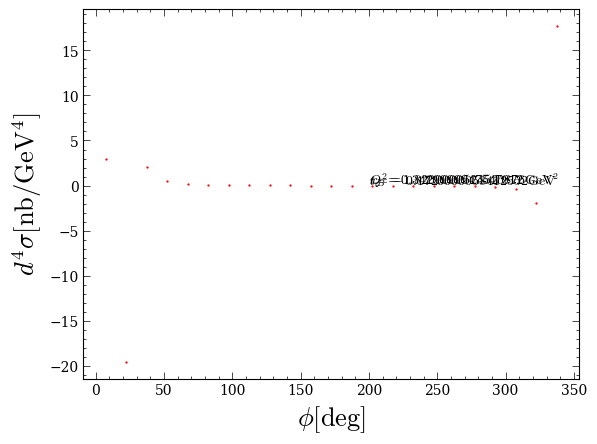

In [82]:
# Load the data from the CSV file
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["font.family"] = "serif"

plt.rcParams["mathtext.fontset"] = "cm" # https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_fontfamily_example.html


# These slightly-modified styles come from: https://github.com/garrettj403/SciencePlots/blob/master/scienceplots/styles/science.mplstyle
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True

# Set y axis
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

# Extract x and y values from the DataFrame
x = jlab_pandas_df['phi_x'][0:23]

y = calculate_bkm10_cross_section_longitudinally_polarized(
    1,
    1,
    jlab_pandas_df['QQ'][0],
    jlab_pandas_df['x_b'][0],
    jlab_pandas_df['t'][0],
    jlab_pandas_df['k'][0],
    jlab_pandas_df['phi_x'][0:23],
    .1,
    .1,
    .1,
    .1,
    .1,
    .1,
    .1,
    .1,
    True
)

fixed_kinematics_Q_squared = jlab_pandas_df['QQ'][0]
fixed_kinematics_x_Bjorken = jlab_pandas_df['x_b'][0]
fixed_kinematics_t = jlab_pandas_df['t'][0]


# https://stackoverflow.com/a/33788258 -> HOW TO FORMAT WITH LATEX STRING
annotation_Q_squared = r"$Q^{{2}} = {} \text{{GeV}}^{{2}}$".format(fixed_kinematics_Q_squared)
annotation_x_Bjorken = r"$x_{{B}} = {} $".format(fixed_kinematics_x_Bjorken)
annotation_t = r"$t = {} \text{{GeV}} $".format(fixed_kinematics_t)

# Plot the data using Matplotlib
plt.scatter(x, y, color = 'red', s = 0.4)

plt.xlabel(r"$\phi [\text{deg}]$", fontsize = 19)
plt.ylabel(r"$d^{4} \sigma [\text{nb}/\text{GeV}^{{4}}]$", fontsize = 19)
plt.annotate(
    annotation_Q_squared,
    (200,.170)
)
plt.annotate(
    annotation_x_Bjorken,
    (200,.150)
)
plt.annotate(
    annotation_t,
    (200,.130)
)
plt.show()

In [83]:
print(jlab_pandas_df['QQ'][500],
    jlab_pandas_df['x_b'][500],
    jlab_pandas_df['t'][500],
    jlab_pandas_df['k'][500],
    jlab_pandas_df['phi_x'][500])

3.1700000762939453 0.3630000054836273 -0.2108500003814697 7.382999897003174 307.5


In [84]:
calculate_bkm10_cross_section_longitudinally_polarized(
    1,
    1,
    jlab_pandas_df['QQ'][0],
    jlab_pandas_df['x_b'][0],
    jlab_pandas_df['t'][0],
    jlab_pandas_df['k'][0],
    jlab_pandas_df['phi_x'][0:23],
    .1,
    .1,
    .1,
    .1,
    .1,
    .1,
    .1,
    .1,
    True
)

> Calculated epsilon to be: 0.47710855714376704
> Calculated y to be: 0.06600386354186408
> Calculated skewness xi to be: 0.20115437410625223
> Calculated t_minimum to be: -0.1382110794045549
> Calculated t prime to be: -0.033788926436700284
> Calculated k_tilde to be: 0.1806703987549284
> Calculated kinematic K to be: 0.5361335678447235
> Calculated k dot delta: 0      0.258947
1     -0.554690
2     -2.126515
3     -4.349412
4     -7.071894
5    -10.108427
6    -13.252078
7    -16.288612
8    -19.011093
9    -21.233990
10   -22.805815
11   -23.619452
12   -23.619452
13   -22.805815
14   -21.233990
15   -19.011093
16   -16.288612
17   -13.252078
18   -10.108427
19    -7.071894
20    -4.349412
21    -2.126515
22    -0.554690
Name: phi_x, dtype: float64
> Computed the P1 propagator to be: 0      1.284557
1      0.390451
2     -1.336830
3     -3.779574
4     -6.771312
5    -10.108162
6    -13.562723
7    -16.899573
8    -19.891311
9    -22.334054
10   -24.061335
11   -24.955441
12   -24.9

0      2.948220+ 0.000116j
1    -19.567703+ 0.000116j
2      2.084046+ 0.000116j
3      0.464724+ 0.000116j
4      0.187446+ 0.000116j
5      0.095835+ 0.000116j
6      0.055601+ 0.000116j
7      0.034617+ 0.000116j
8      0.022212+ 0.000116j
9      0.014055+ 0.000116j
10     0.008101+ 0.000116j
11     0.003237+ 0.000116j
12    -0.001260+ 0.000116j
13    -0.006001+ 0.000116j
14    -0.011686+ 0.000116j
15    -0.019368+ 0.000116j
16    -0.030964+ 0.000116j
17    -0.050525+ 0.000116j
18    -0.088009+ 0.000116j
19    -0.173348+ 0.000116j
20    -0.431183+ 0.000116j
21    -1.927218+ 0.000116j
22    17.693384+ 0.000116j
Name: phi_x, dtype: complex128

In [85]:
jlab_pandas_df.head(25)

,k,QQ,x_b,t,phi_x,F,sigmaF,ReH,ReE,ReHt,dvcs
0,5.75,1.820,0.343,-0.172,7.5,0.120053,0.00492,-0.992404,-0.31,-0.396272,0.017761
1,5.75,1.820,0.343,-0.172,22.5,0.114969,0.00468,-0.992404,-0.31,-0.396272,0.017761
2,5.75,1.820,0.343,-0.172,37.5,0.106078,0.00420,-0.992404,-0.31,-0.396272,0.017761
3,5.75,1.820,0.343,-0.172,52.5,0.095266,0.00396,-0.992404,-0.31,-0.396272,0.017761
4,5.75,1.820,0.343,-0.172,67.5,0.084249,0.00360,-0.992404,-0.31,-0.396272,0.017761
5,5.75,1.820,0.343,-0.172,82.5,0.074176,0.00336,-0.992404,-0.31,-0.396272,0.017761
6,5.75,1.820,0.343,-0.172,97.5,0.065618,0.00312,-0.992404,-0.31,-0.396272,0.017761
7,5.75,1.820,0.343,-0.172,112.5,0.058737,0.00288,-0.992404,-0.31,-0.396272,0.017761
8,5.75,1.820,0.343,-0.172,127.5,0.053480,0.00276,-0.992404,-0.31,-0.396272,0.017761
9,5.75,1.820,0.343,-0.172,142.5,0.049710,0.00252,-0.992404,-0.31,-0.396272,0.017761


In [86]:
jlab_pandas_df['k'][1]

5.75

In [87]:
jlab_pandas_df['QQ'][1]

1.8200000524520876

In [88]:
jlab_pandas_df['x_b'][1]

0.3429999947547912

In [89]:
jlab_pandas_df['t'][1]

-0.1720000058412552

In [90]:
jlab_pandas_df['phi_x'][1]

22.5

In [91]:
jlab_pandas_df.rows()

AttributeError: 'DataFrame' object has no attribute 'rows'

In [ ]:
5 + 5j